TODO

write top-level aggregate p value calculation that uses a 'buffer' ring for the background

check correctness of the background variance contribution

use numba wherever possible

look at lingjia's signal to noise definition

In [1]:
from ybco import *
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from scipy.io import savemat

import matplotlib.pyplot as plt
import numpy as np

# def filter_and_sum_histograms(histograms, energies, Emin, Emax):
#     # Create a mask based on energy constraints
#     energy_mask = (energies >= Emin) & (energies <= Emax)
    
#     # Apply the energy mask to the histograms
#     filtered_histograms = histograms[energy_mask, :, :]
    
#     # Sum along the 0th axis
#     summed_histograms = np.sum(filtered_histograms, axis=0)
    
#     return summed_histograms

# def calculate_signal_background_noI0(data, infilled_clusters, buf1=10, buf2=20):
#     # Run the analysis
# #     emd_values, p_values, _, roi_connected_cluster, _, _ = run_histogram_analysis(
# #         data, bin_boundaries, hist_start_bin, roi_x_start, roi_x_end, roi_y_start, roi_y_end,
# #         threshold=threshold)
#     local_histograms = calculate_histograms(data, bin_boundaries, hist_start_bin)
# #     filtered_clusters = filter_negative_clusters_by_size(roi_connected_cluster, M=50)
#     integrated_counts = filter_and_sum_histograms(local_histograms, energies, 8, 10)
    
#     buffer = create_continuous_buffer(infilled_clusters, buf1)
#     buffer = create_continuous_buffer(infilled_clusters | buffer, buf2)
#     signal, bg = background_subtraction(integrated_counts, infilled_clusters, buffer)
#     #mark
#     # Poisson statistics for variance
#     var_signal = signal  # variance for signal
#     var_bg = bg  # variance for background
    
#     # Combined variance in quadrature
#     total_var = np.sqrt(var_signal**2 + var_bg**2)
    
#     return signal, bg, total_var

# def calculate_signal_noI0(data, infilled_clusters, buf1=20, buf2=20):
#     integrated_counts = filter_and_sum_histograms(histograms, energies, 8, 10)
        
#     # Poisson statistics for variance
#     var_signal = signal  # variance for signal
    
#     return signal, var_signal

# import numpy as np
# from scipy.ndimage import binary_dilation
# import matplotlib.pyplot as plt
# from typing import Union

# def create_continuous_buffer(infilled_clusters: np.ndarray, thickness: int = 10, num_pixels: int = None) -> np.ndarray:
#     buffer = np.zeros_like(infilled_clusters, dtype=bool)
#     dilated_region = binary_dilation(infilled_clusters, iterations=thickness)
#     buffer = dilated_region & (~infilled_clusters)
#     if num_pixels is not None:
#         buffer_pixels = np.argwhere(buffer)
#         if buffer_pixels.shape[0] > num_pixels:
#             remove_indices = np.random.choice(buffer_pixels.shape[0], size=buffer_pixels.shape[0] - num_pixels, replace=False)
#             buffer_pixels_to_remove = buffer_pixels[remove_indices]
#             buffer[buffer_pixels_to_remove[:, 0], buffer_pixels_to_remove[:, 1]] = False
#     return buffer

# def calculate_average_counts(integrated_counts: np.ndarray, buffer: np.ndarray) -> Union[float, None]:
#     counts_in_buffer = integrated_counts[buffer]
#     if counts_in_buffer.size == 0:
#         return None
#     M = np.mean(counts_in_buffer)
#     return M

# def calculate_total_counts(integrated_counts: np.ndarray, infilled_clusters: np.ndarray) -> int:
#     counts_in_signal = integrated_counts[infilled_clusters]
#     S = np.sum(counts_in_signal)
#     return S

# def background_subtraction(integrated_counts: np.ndarray, infilled_clusters: np.ndarray, buffer: np.ndarray) -> Union[float, None]:
#     # TODO unequal signal and background
#     N = np.sum(infilled_clusters)
#     M = calculate_total_counts(integrated_counts, buffer)
#     if M is None:
#         return None
#     S = calculate_total_counts(integrated_counts, infilled_clusters)
#     return S, M * N / np.sum(buffer)
#     result = S - N * M
#     return result

# 1$^{st}$ pass

##### Python code 1st pass (no time bins, only laser OFF shots!):
##### Run number
##### ROI
##### Energy threshold
##### I0 threshold
##### Output:
##### ROI image
##### Combined projection – select integration region
##### CDW integrated signal vs std. dev
##### Scope:
##### Cycle over energy threshold parameters and I0 parameters.
##### Test normalization methods

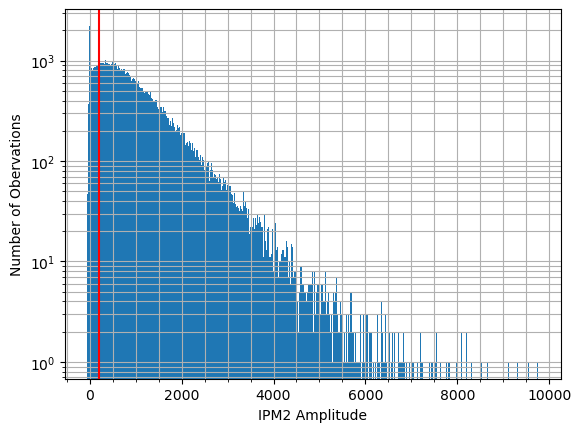

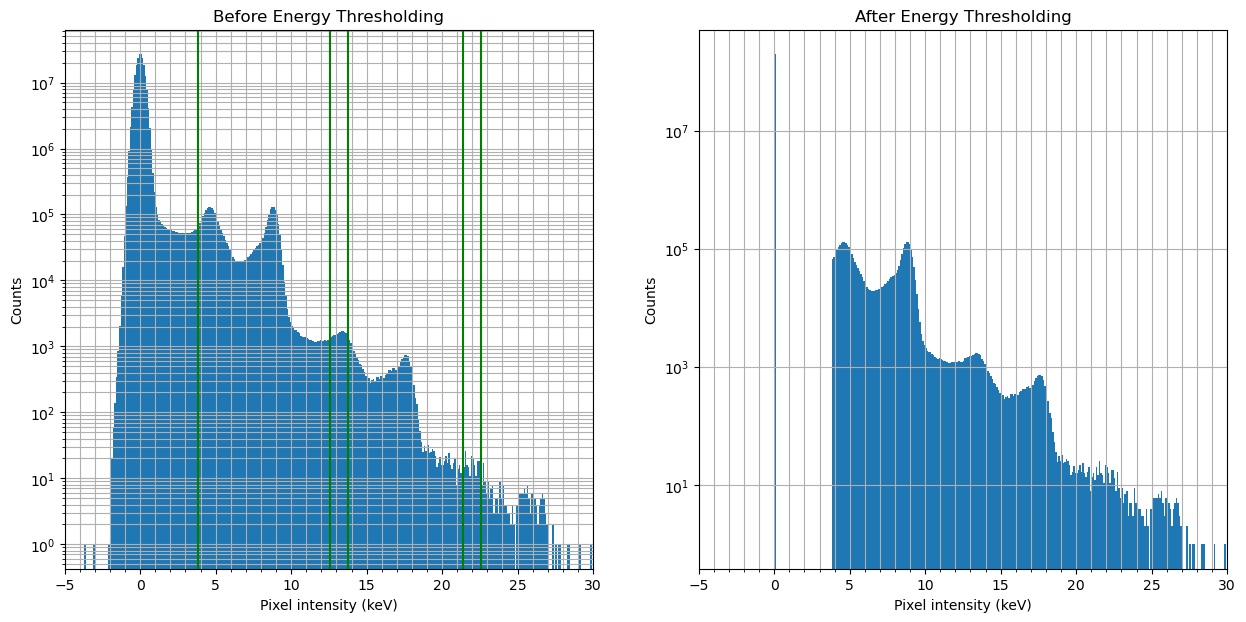

In [2]:
Run_Number = 195
ROI = [5,105,50,250]
Energy_Filter = [8.8,5]
I0_Threshold = 200
# aimg,simg, imgs_thresh, evt_filter = CDW_Optimizer(Run_Number, ROI, Energy_Filter, I0_Threshold)
aimg,simg, imgs_thresh = CDW_Optimizer(Run_Number, ROI, Energy_Filter, I0_Threshold)

In [3]:
# these are just laser off. previous version of the analysis used all the images
imgs_thresh.shape

(27180, 100, 200)

In [4]:
# %run histogram_analysis.py
from lcls.histogram_analysis import *

In [ ]:
from scipy.stats import wasserstein_distance
from scipy.ndimage import label

# Redefine bin boundaries
# bin_boundaries = np.arange(-10, 30, 0.1)
bin_boundaries = np.arange(5, 30, 0.2)
hist_start_bin = 1

# Define parameters
roi_x_start, roi_x_end = 50, 100
roi_y_start, roi_y_end = 0, 200

data = imgs_thresh#[:7000, ...]#load_data(filepath)
histograms = calculate_histograms(data, bin_boundaries, hist_start_bin)

threshold = .2
# Run the analysis
emd_values, p_values, _, roi_connected_cluster, _, infilled_clusters = run_histogram_analysis(
    data, bin_boundaries, hist_start_bin, roi_x_start, roi_x_end, roi_y_start, roi_y_end,
    threshold = threshold)

In [ ]:
# np.savez('histograms.npz', histograms)

# np.savez('infilled_clusters.npz', np.vstack((infilled_clusters[70:], infilled_clusters[:70])))

In [ ]:
plt.imshow(data.sum(axis = 0), cmap = 'jet')
plt.colorbar()

In [ ]:
# smalldata = data[:70000].reshape((1000, -1, data.shape[1], data.shape[2])).sum(axis = 0)

In [ ]:
#tmp = data

In [ ]:
# data = smalldata

In [ ]:
#np.savez('smalldata_dirty.npz', smalldata)

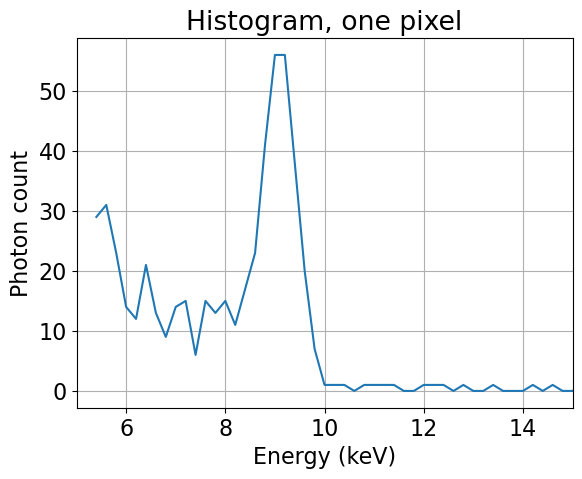

In [6]:
import matplotlib.pyplot as plt

# Increase font size for labels and tick labels
plt.rcParams.update({'font.size': 16})  # You can adjust the font size as needed

energies = bin_boundaries[hist_start_bin + 1:]

plt.plot(energies, histograms[:, 50, 50])
plt.xlabel('Energy (keV)')
plt.ylabel('Photon count')
plt.title('Histogram, one pixel')
plt.xlim((5, 15))
plt.grid()

plt.show()


In [13]:
# data = tmp

In [ ]:
threshold = .2
# Run the analysis
emd_values, p_values, _, roi_connected_cluster, _, infilled_clusters = run_histogram_analysis(
    bin_boundaries = bin_boundaries, hist_start_bin = hist_start_bin,
    roi_x_start = roi_x_start, roi_x_end = roi_x_end,
    roi_y_start = roi_y_start, roi_y_end = roi_y_end,
    data = data,
    threshold = threshold)
filtered_clusters = filter_negative_clusters_by_size(roi_connected_cluster, M=50)

# infilled_clusters = np.vstack((infilled_clusters[70:], infilled_clusters[:70]))

In [ ]:
pwd

In [15]:
# # def mk_emd_statistic(average_histogram):
# #     def statistic(*histograms_flat):
# #         return np.mean([wasserstein_distance(histogram, average_histogram) for
# #                histogram in histograms_flat])
# #     return statistic

# import numpy as np
# from scipy.stats import wasserstein_distance
# # from scipy.stats import permutation_test


# # def perform_permutation_test(sample1, sample2, num_permutations, average_histogram, random_state=None):
# #     statistic = mk_emd_statistic(average_histogram)
# #     return permutation_test([sample1, sample2], statistic, n_resamples = num_permutations,
# #                            random_state = random_state).pvalue
    
    
# def perform_permutation_test(sample1, sample2, num_permutations, random_state=None):
#     # Handle empty arrays or arrays with NaNs
#     if len(sample1) == 0 or len(sample2) == 0 or np.isnan(sample1).any() or np.isnan(sample2).any():
#         return np.nan
    
#     np.random.seed(random_state)
    
#     # Use absolute value for observed_diff
#     observed_diff = np.abs(np.mean(sample1) - np.mean(sample2))
#     all_samples = np.concatenate([sample1, sample2])
#     count_extreme_values = 0
    
#     for _ in range(num_permutations):
#         np.random.shuffle(all_samples)
#         new_diff = np.abs(np.mean(all_samples[:len(sample1)]) - np.mean(all_samples[len(sample1):]))
#         if new_diff >= observed_diff:
#             count_extreme_values += 1
            
#     p_value = count_extreme_values / num_permutations
#     return p_value

# # Wrapper function to calculate EMD values with a specified ROI
# def calculate_emd_values_with_roi(data, bin_boundaries, hist_start_bin, roi_coordinates):
#     histograms = calculate_histograms(data, bin_boundaries, hist_start_bin)
#     roi_x_start, roi_x_end, roi_y_start, roi_y_end = roi_coordinates
#     average_histogram = get_average_roi_histogram(histograms, roi_x_start, roi_x_end, roi_y_start, roi_y_end)
#     emd_values = calculate_emd_values(histograms, average_histogram)
#     return emd_values, average_histogram

# # Top-level function to execute a permutation test to compare EMD values between a signal ROI and background
# def compute_aggregate_pvals(data, bin_boundaries, hist_start_bin, roi_coordinates, threshold, num_permutations, random_state=None):
#     _, _, _, _, _, infilled_clusters = run_histogram_analysis(
#         data, bin_boundaries, hist_start_bin, roi_coordinates[0], roi_coordinates[1], 
#         roi_coordinates[2], roi_coordinates[3], num_permutations=num_permutations, threshold=threshold)
    
#     emd_values, average_histogram = calculate_emd_values_with_roi(data, bin_boundaries, hist_start_bin, roi_coordinates)
#     signal_emd_values = emd_values[infilled_clusters].flatten()
    
#     roi_x_start, roi_x_end, roi_y_start, roi_y_end = roi_coordinates
#     background_emd_values = emd_values[roi_y_start:roi_y_end, roi_x_start:roi_x_end].flatten()
    
# #     p_value = perform_permutation_test(signal_emd_values, background_emd_values, num_permutations, average_histogram,
# #                                        random_state)
#     p_value = perform_permutation_test(signal_emd_values, background_emd_values,
#                                        num_permutations, random_state)
#     return p_value


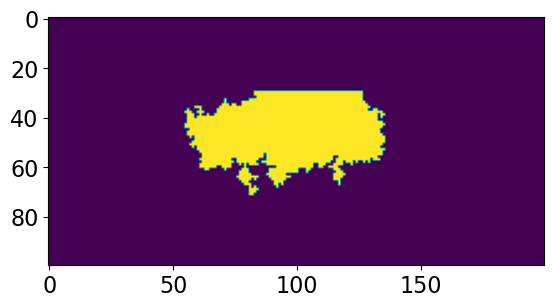

In [20]:
plt.imshow(np.vstack(infilled_clusters))

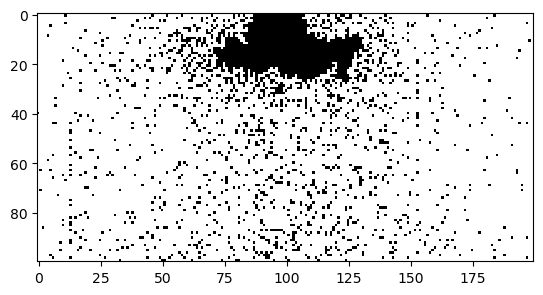

In [8]:
plt.imshow(roi_connected_cluster, interpolation = 'none', cmap = 'gray')

In [ ]:
plt.imshow(infilled_clusters, interpolation = 'none', cmap = 'gray')

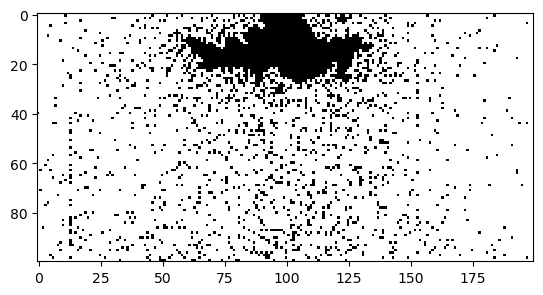

In [9]:
plt.imshow(roi_connected_cluster, interpolation = 'none', cmap = 'gray')

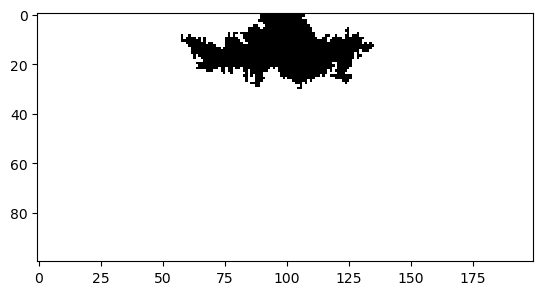

In [10]:
plt.imshow(filtered_clusters, interpolation = 'none', cmap = 'gray')

In [53]:
imgs_sum[filtered_clusters].mean(), imgs_sum[~filtered_clusters].mean()

(12074.578, 12783.718)

## TODO move all this into a module

In [290]:
step = .02
M_value = 50

threshold_values = np.arange(step, .4 + step, step) 
threshold_values = list(map(lambda x: round(float(x), 2),
                            threshold_values))

precomputed_data = precompute_analysis_data(data, bin_boundaries,
        hist_start_bin, roi_x_start, roi_x_end, roi_y_start,
        roi_y_end, M_value, threshold_values)

In [292]:
from ipywidgets import interact, widgets

vmin = 11000

# Wrapper function to encapsulate the entire workflow
def interactive_histogram_analysis(data, bin_boundaries, hist_start_bin, roi_x_start, roi_x_end,
                                   roi_y_start, roi_y_end, M_value, threshold_values, step):
    # Precompute data
    precomputed_data = precompute_analysis_data(data, bin_boundaries, hist_start_bin, roi_x_start, roi_x_end,
                                                roi_y_start, roi_y_end, M_value, threshold_values)

    # Calculate imgs_sum
    imgs_sum = data.sum(axis=0)
    
    # Define update_visualization as a closure
    def update_visualization_closure(threshold):
        update_visualization(precomputed_data, threshold, imgs_sum)
    
    # Generate the interactive plot
    threshold_slider = widgets.FloatSlider(
        value=min(threshold_values),
        min=min(threshold_values),
        max=max(threshold_values),
        step=step,
        description='Threshold:',
        continuous_update=False
    )

    interact(update_visualization_closure, threshold=threshold_slider)

def update_visualization(precomputed_data, threshold, imgs_sum):
    """
    Update the imshow plots based on the selected threshold value.
    """  
    threshold = round(threshold, 2)
 
    data = precomputed_data[threshold]
    p_threshold_mask = data['p_threshold_mask']
    filtered_clusters = rectify_filter_mask(
        data['filtered_clusters'],
        data['data'])
    
    fig = plt.figure(figsize=(12, 6))

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.title('p threshold map')
    plt.imshow(p_threshold_mask, interpolation='none', cmap='gray')
    
    plt.subplot(1, 3, 2)
    plt.title(f'Final mask')
    plt.imshow(filtered_clusters, interpolation='none', cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.title(f'')
    plt.imshow((filtered_clusters) * imgs_sum, interpolation='none',
               cmap='jet')    
    plt.show()    

In [293]:
interactive_histogram_analysis(data, bin_boundaries,
    hist_start_bin, roi_x_start, roi_x_end, roi_y_start, roi_y_end,
    M_value, threshold_values, step)

interactive(children=(FloatSlider(value=0.02, continuous_update=False, description='Threshold:', max=0.4, min=…

In [19]:
import pixelsets as ps

In [20]:
# from importlib import reload
# reload(ps)

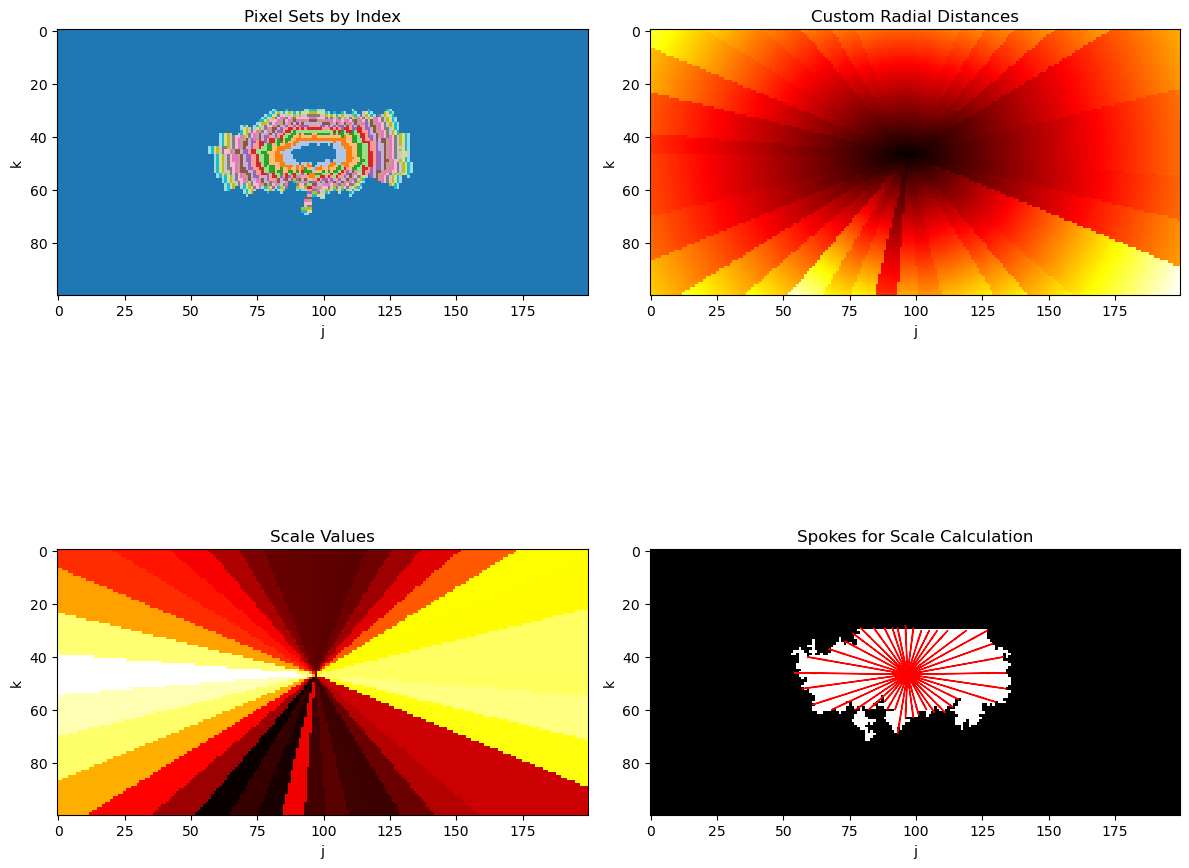

In [21]:
custom_distances_original, pixel_sets_original, pixel_set_indices_original, scale_values_original = ps.run_radial_analysis(
        infilled_clusters, num_pixels_per_set=100)
ps.plot_radial_analysis(infilled_clusters, custom_distances_original, pixel_set_indices_original,
                        scale_values_original)

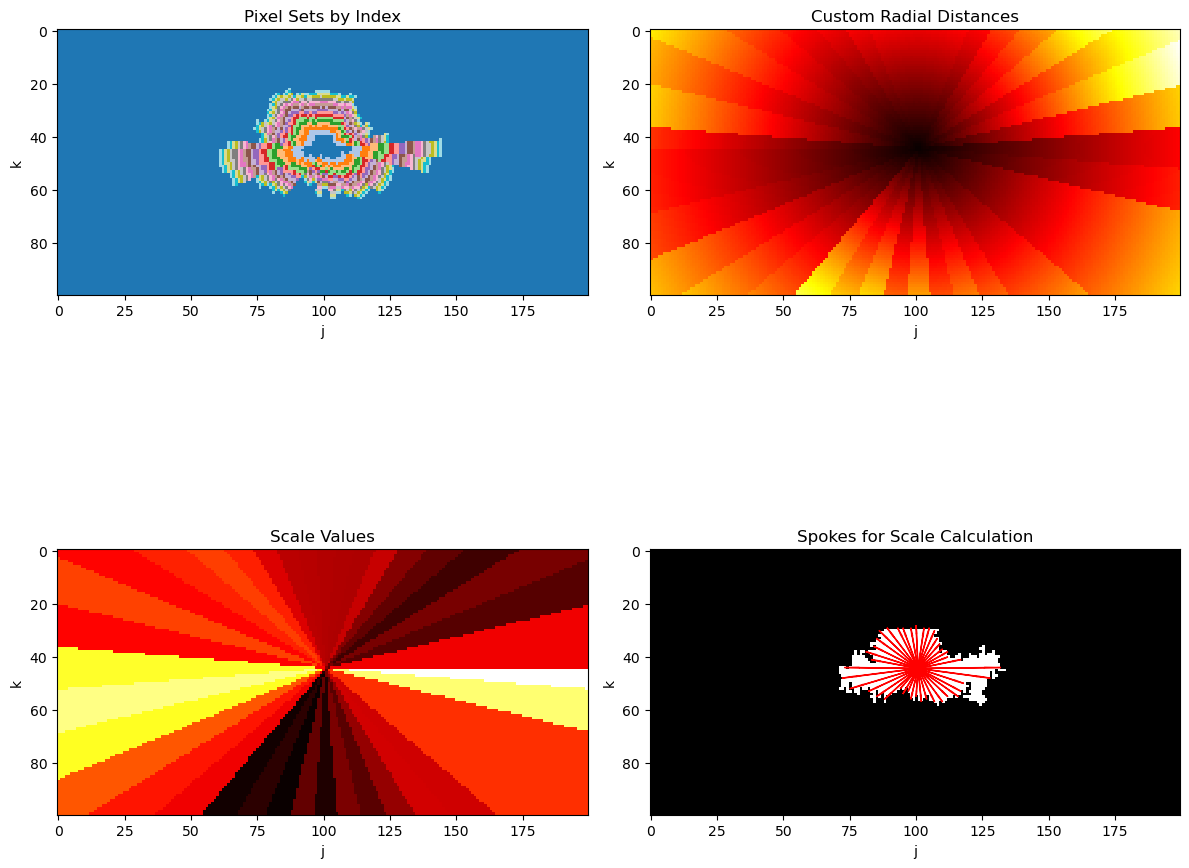

In [14]:
custom_distances_original, pixel_sets_original, pixel_set_indices_original, scale_values_original = ps.run_radial_analysis(
        infilled_clusters, num_pixels_per_set=100)
ps.plot_radial_analysis(infilled_clusters, custom_distances_original, pixel_set_indices_original,
                        scale_values_original)


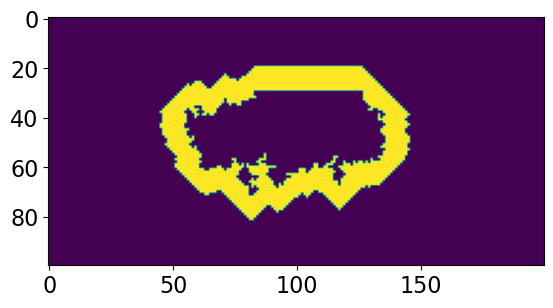

In [159]:
plt.imshow(buffer)

In [168]:
energies.shape, histograms.shape

((123,), (123, 100, 200))

In [228]:
signal - bg

32062.599999999977

In [283]:
signal, bg, var = calculate_signal_background_noI0(data, infilled_clusters, bin_boundaries,
                                                   hist_start_bin, 20, 20)

In [261]:
signal, bg, var = calculate_signal_background_noI0(data, .05, bin_boundaries,
                                                   hist_start_bin, 20, 20)

In [263]:
signal / np.sqrt(var)

510.0554747535494

In [229]:
signal / bg

1.082415424365293

In [260]:
signal / np.sqrt(var)

594.8892294525817

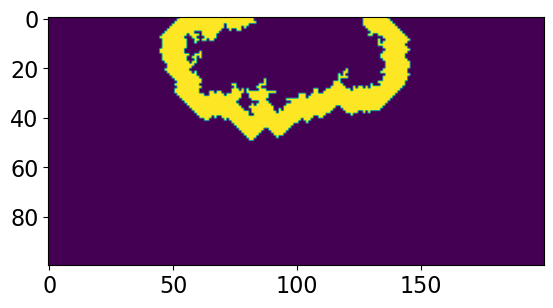

In [176]:
plt.imshow(buffer)

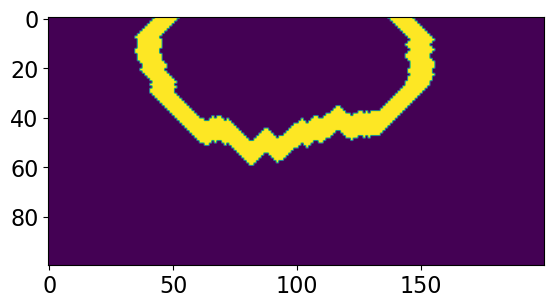

In [179]:
plt.imshow(create_continuous_buffer(infilled_clusters | buffer, 10))

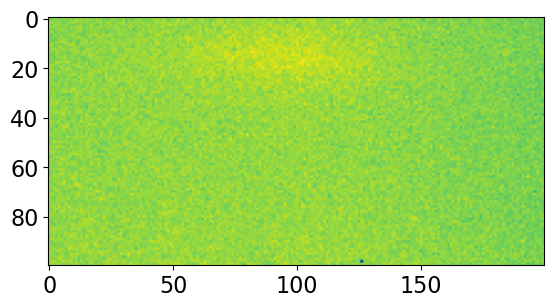

In [144]:
plt.imshow(integrated_counts)

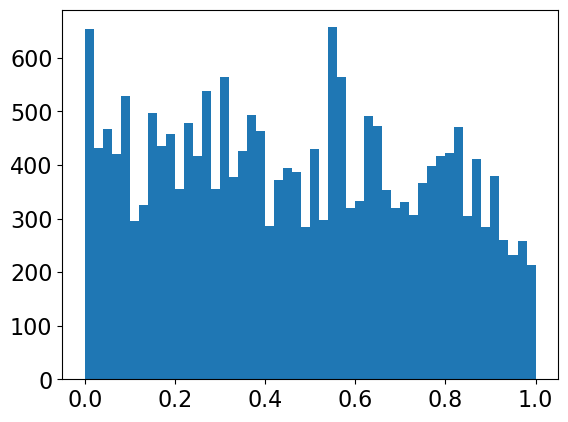

In [20]:
plt.hist(p_values.ravel(), bins = 50);

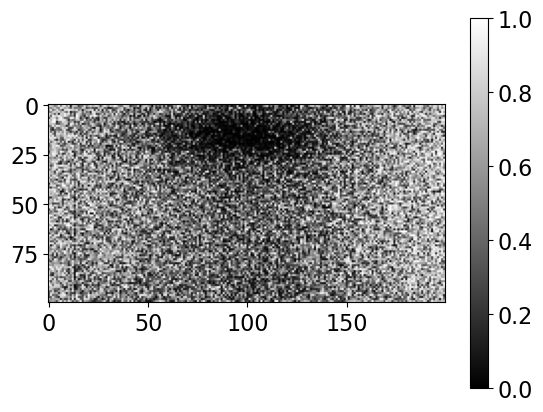

In [21]:
plt.imshow((p_values), cmap = 'gray')
plt.colorbar()

### Plan

0. Energy thresholding
1. separation by delay time
2. background fitting
3. peak integration
4. uncertainty estimation (just Poisson statistics on integrated counts to start

In [15]:
# np.savez('mask.npz', precomputed_data[.2]['filtered_clusters'])

In [51]:
import matplotlib.pyplot as plt
import imageio


def generate_frames(precomputed_data):
    frames = []
    for threshold, data in precomputed_data.items():
        fig, axs = plt.subplots(1, 3, figsize=(12, 3))
        
        axs[0].set_title('p threshold map')
        im1 = axs[0].imshow(data['p_threshold_mask'], interpolation='none', cmap='gray')
        
        axs[1].set_title('Final mask')
        im2 = axs[1].imshow(rectify_filter_mask(data['filtered_clusters']), interpolation='none', cmap='gray')
        
        axs[2].set_title('')
        im3 = axs[2].imshow((~rectify_filter_mask(data['filtered_clusters'])) * imgs_sum, interpolation='none', cmap='jet', vmin = vmin)
        
        # Include text that shows the threshold value for the frame
        plt.figtext(0.5, 0.1, f'Threshold: {threshold}', ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5})
        
        # Capture the current frame as an image
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        
        frames.append(image)
        
        plt.close(fig)
    
    return frames


# Step 2: Helper function to compose GIF
def compose_gif(frames, frame_rate):
    """
    Compose the frames into a GIF with the specified frame rate.
    """
    imageio.mimsave('animated_visualization.gif', frames, duration=frame_rate)

# Step 3: Main function to create GIF
def create_gif_from_data(precomputed_data, frame_rate=0.5):
    """
    Create a GIF from the precomputed_data with the specified frame rate.
    """
    frames = generate_frames(precomputed_data)
    compose_gif(frames, frame_rate)

# Path to the GIF file
gif_file_path = 'animated_visualization.gif'
create_gif_from_data(precomputed_data)

In [14]:
average_histogram = get_average_roi_histogram(histograms, roi_x_start, roi_x_end, roi_y_start, roi_y_end)
emd_values = calculate_emd_values(histograms, average_histogram)

num_permutations = 1000
null_distribution = generate_null_distribution(histograms, average_histogram, roi_x_start, roi_x_end, roi_y_start, roi_y_end,
                                              num_permutations)
p_values = calculate_p_values(emd_values, null_distribution)
labeled_array, roi_connected_cluster = identify_roi_connected_cluster(p_values, 0.2, roi_x_start, roi_x_end, roi_y_start, roi_y_end)

# emd_values, p_values, roi_connected_cluster


NameError: name 'histograms' is not defined

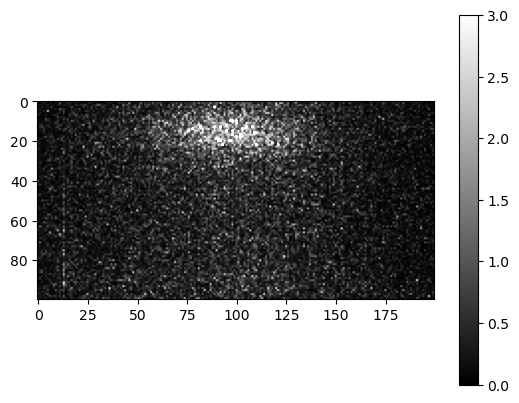

In [12]:
plt.imshow(-np.log10(p_values + 1e-9), cmap = 'gray', vmax = 3)
plt.colorbar()

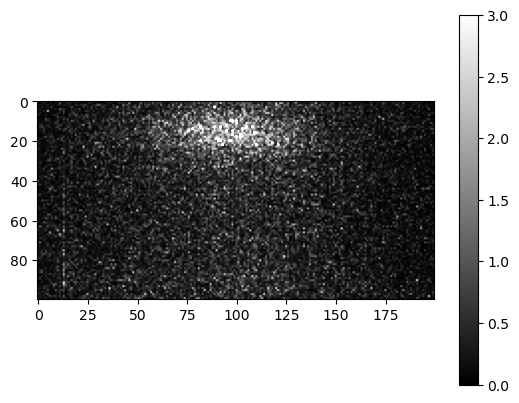

In [78]:
plt.imshow(-np.log10(p_values + 1e-9), cmap = 'gray', vmax = 3)
plt.colorbar()

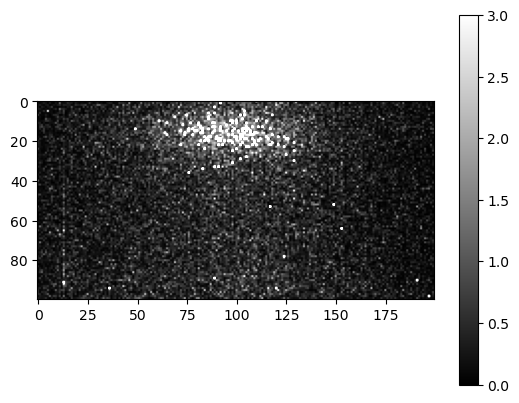

In [39]:
plt.imshow(-np.log10(p_values + 1e-9), cmap = 'gray', vmax = 3)
plt.colorbar()

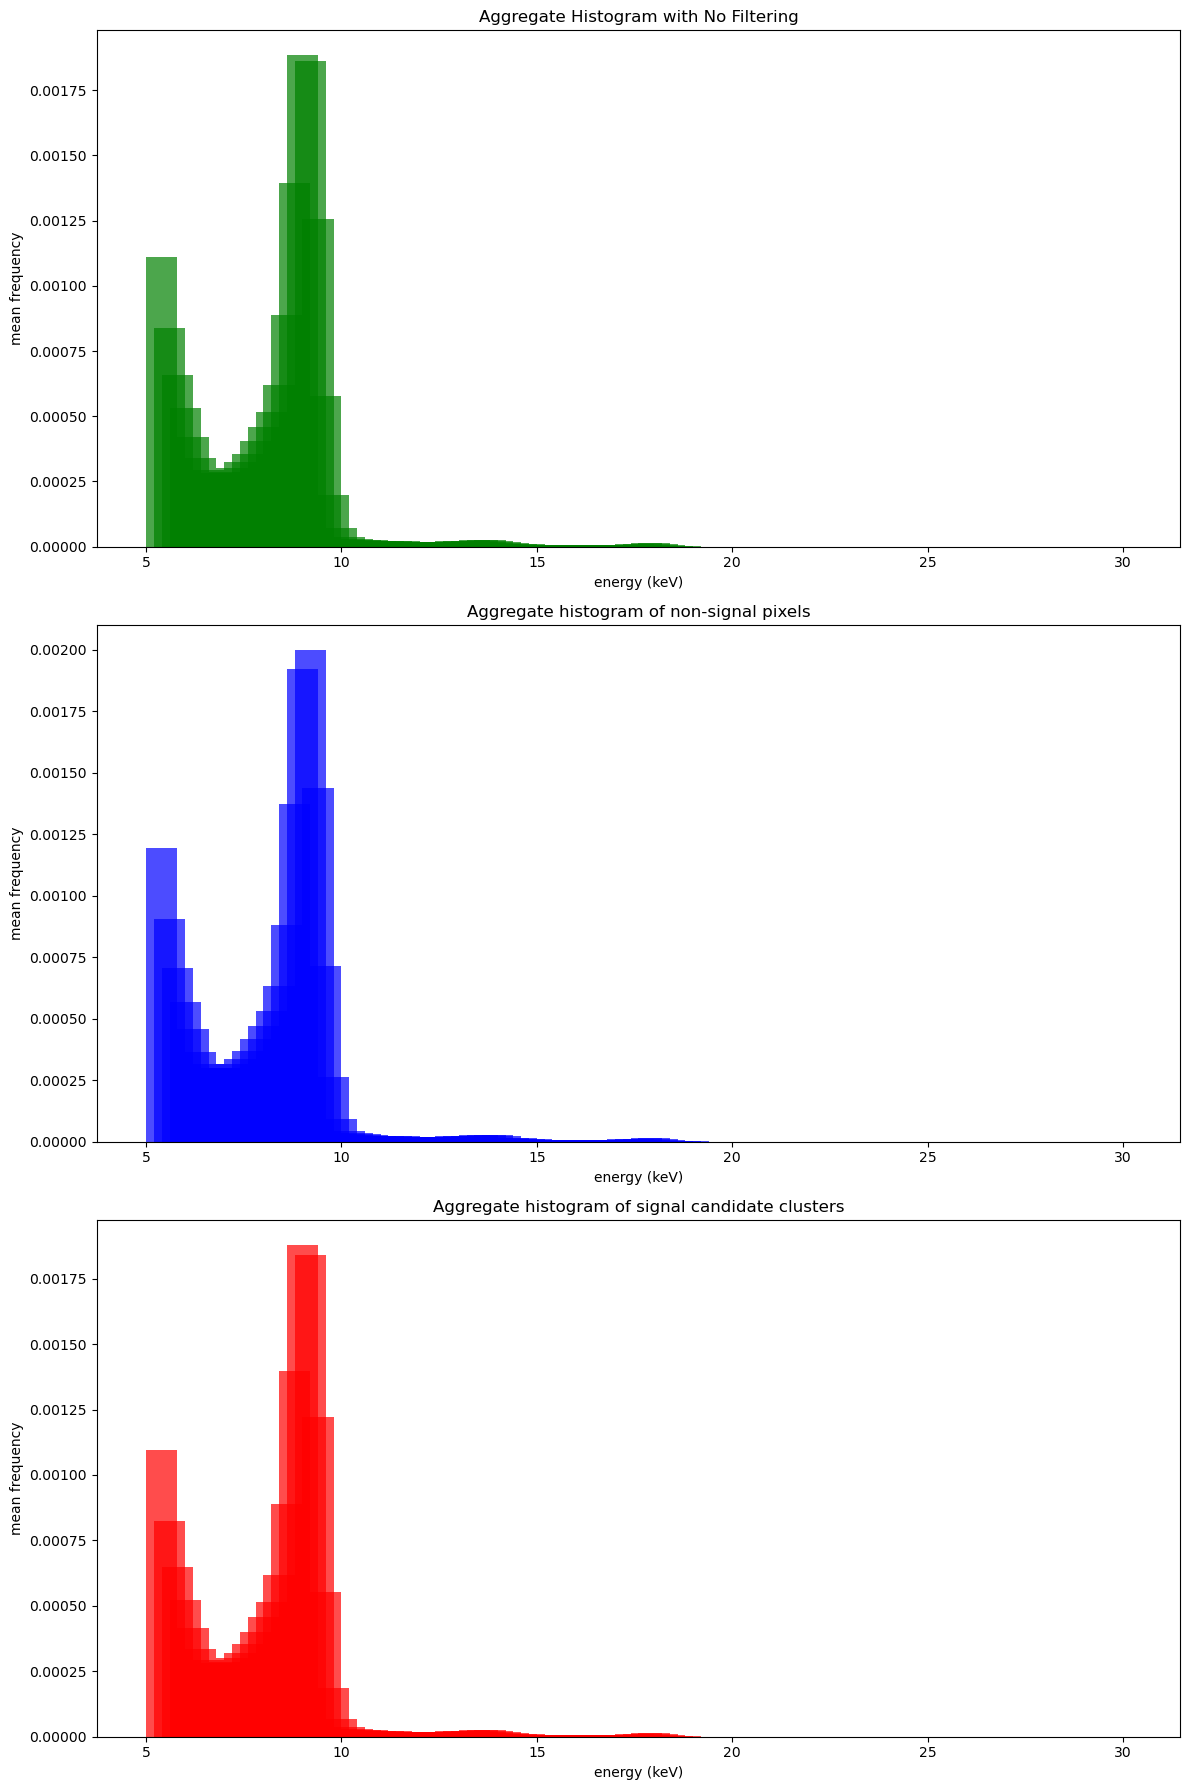

In [25]:
# Call the visualize_histogram_comparison function using the actual data
visualize_histogram_comparison(histograms, filtered_clusters, bin_boundaries, hist_start_bin)

In [22]:
np.savez('imgs_thresh_dirty.npz', imgs_thresh[:5, ...])

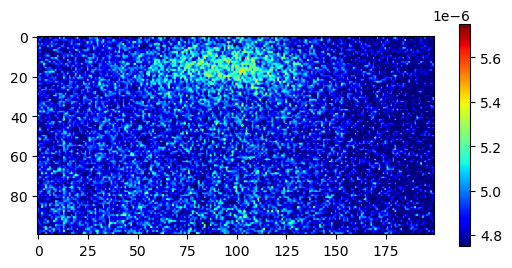

In [3]:
# check the standard deviation
plt.imshow(simg,clim=[4.75e-6,5.75e-6],cmap='jet')
plt.colorbar(shrink=0.6)
plt.show()

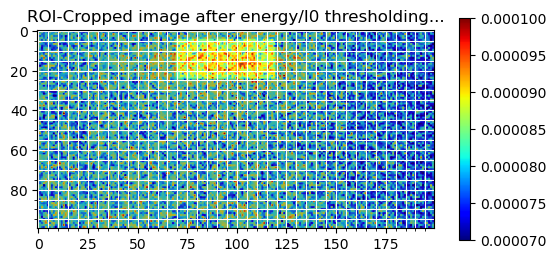

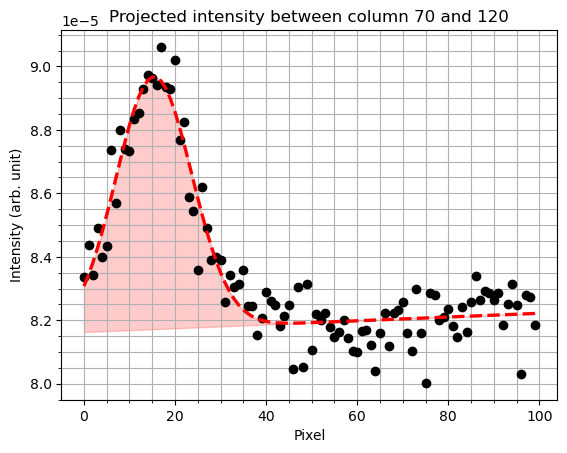

Signal over background ratio is: 0.097
Signal over uncertainity ratio is: 12.307


In [4]:
ROI_FG = [5,25,70,120]
SNR_a,SNR_b = SNR_analysis(aimg,ROI_FG)

# 2$^{rd}$ pass

##### Python code 2nd pass (pump-probe signal quick eval)
##### Run number
##### ROI
##### Optimal energy threshold
##### Optimal I0 threshold
##### IPM2 position threshold/filter
##### Time bins (meaning number to divide the time delay axis)
##### Output:
##### ROI image
##### Projections vs bins
##### CDW integrated signal vs time
##### Std. dev of integrated signal
##### Scope: evaluate normalization/filtering effect on pump-probe signal

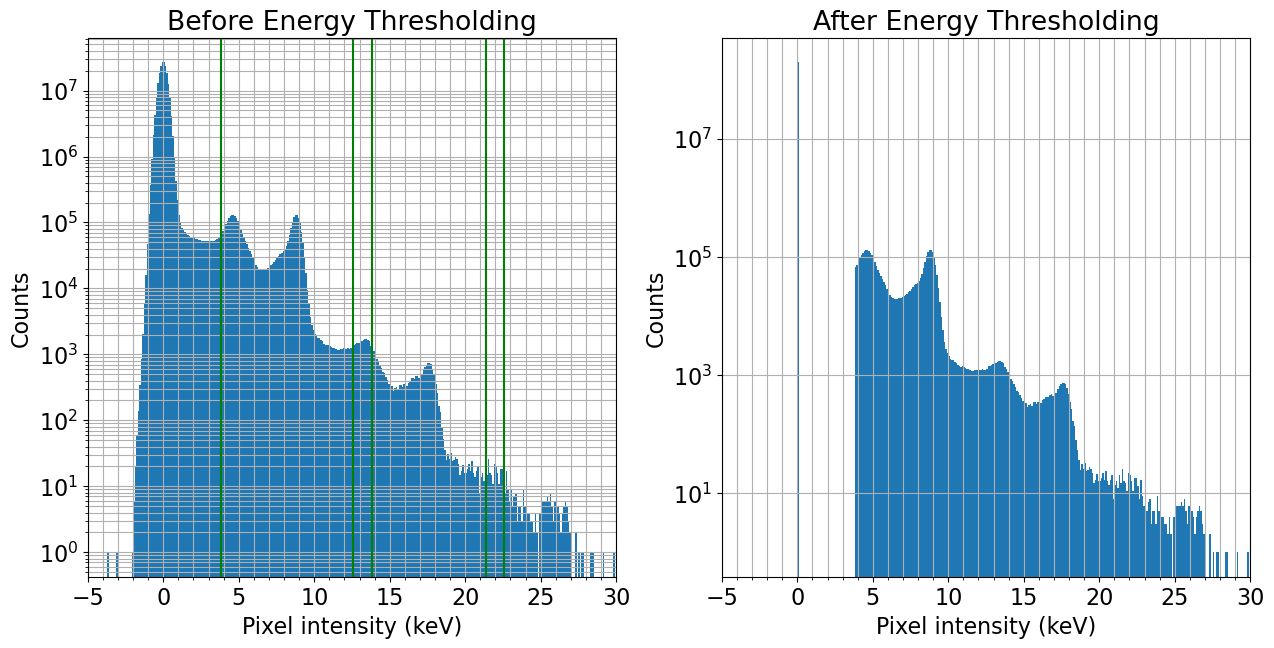

In [17]:
import numpy as np

# Define your parameters for CDW_PP
# IPM_pos_Filter, Time_bin, TimeTool = [0.2,0.5],1.,[1.,0.005]
IPM_pos_Filter, Time_bin, TimeTool = [0.2,0.5],2,[0.,0.005]

Run_Number = 195
ROI = [5,105,50,250]
Energy_Filter = [8.8,5]
I0_Threshold = 200


def delay_bin(delay, delay_raw, Time_bin, arg_delay_nan):
    # Adjust the bin width to ensure it's a float
    Time_bin = float(Time_bin)
    
    # Determine the minimum and maximum values from the non-NaN delays
    delay_min = np.floor(delay_raw[arg_delay_nan == False].min())
    delay_max = np.ceil(delay_raw[arg_delay_nan == False].max())
    
    # Create bins that are shifted by half the bin width
    half_bin = Time_bin / 2
    bins = np.arange(delay_min - half_bin, delay_max + Time_bin, Time_bin)
    
    # Assign each delay to the nearest bin
    binned_indices = np.digitize(delay, bins, right=True)
    
    # Convert bin indices to delay values
    binned_delays = bins[binned_indices - 1] + half_bin
    
    # Ensure that the binned delays are within the min and max range
    binned_delays = np.clip(binned_delays, delay_min, delay_max)
    
    return binned_delays

def CDW_PP(Run_Number, ROI, Energy_Filter, I0_Threshold, IPM_pos_Filter, Time_bin, TimeTool,
          min_count = 200):
    rr = SMD_Loader(Run_Number)  # Small Data Import
    
    # Mask for bad pixels
    idx_tile = rr.UserDataCfg.jungfrau1M.ROI_0__ROI_0_ROI[()][0,0]
    mask = rr.UserDataCfg.jungfrau1M.mask[idx_tile][rr.UserDataCfg.jungfrau1M.ROI_0__ROI_0_ROI[()][1,0]:rr.UserDataCfg.jungfrau1M.ROI_0__ROI_0_ROI[()][1,1],rr.UserDataCfg.jungfrau1M.ROI_0__ROI_0_ROI[()][2,0]:rr.UserDataCfg.jungfrau1M.ROI_0__ROI_0_ROI[()][2,1]]
    
    I0 = rr.ipm2.sum[:]
    arg_I0 = (I0 >= I0_Threshold)
    
    # IPM Positional Filter
    I0_x = rr.ipm2.xpos[:]
    I0_y = rr.ipm2.ypos[:]
    arg = (abs(I0_x) < 2.) & (abs(I0_y) < 3.)
    I0_x_mean, I0_y_mean = I0_x[arg].mean(), I0_y[arg].mean()
    arg_I0_x = (I0_x < (I0_x_mean + IPM_pos_Filter[0])) & (I0_x > (I0_x_mean - IPM_pos_Filter[0]))
    arg_I0_y = (I0_y < (I0_y_mean + IPM_pos_Filter[1])) & (I0_y > (I0_y_mean - IPM_pos_Filter[1]))

    # Time Tool Logic
    tt_arg = TimeTool[0]
    delay = np.array(rr.enc.lasDelay) + np.array(rr.tt.FLTPOS_PS) * tt_arg
    arg_delay_nan = np.isnan(delay)
    
    # Energy Filtering
    imgs = EnergyFilter(rr, Energy_Filter, ROI)
    
    # Laser On/Off Logic
    arg_laser_on = (np.array(rr.evr.code_90) == 1.)
    arg_laser_off = (np.array(rr.evr.code_91) == 1.)

    # Time binning and grouping by delay
    bin_width = 0.5

    binned_delays = delay_bin(delay, np.array(rr.enc.lasDelay), Time_bin, arg_delay_nan)
        
    stacks_on = extract_stacks_by_delay_optimized(binned_delays[arg_laser_on], imgs[arg_laser_on], Time_bin, min_count)
    stacks_off = extract_stacks_by_delay_optimized(binned_delays[arg_laser_off], imgs[arg_laser_off], Time_bin, min_count)


    return stacks_on, stacks_off, I0, binned_delays, arg_laser_on, arg_laser_off

def extract_stacks_by_delay_optimized(binned_delays, img_array, bin_width, min_count):
    unique_binned_delays = np.unique(binned_delays)
    stacks = {}
    
    mask = np.zeros_like(binned_delays, dtype=bool)
    for d in unique_binned_delays:
        mask |= (binned_delays == d)
    
    filtered_binned_delays = binned_delays[mask]
    filtered_imgs = img_array[mask]
    
    for d in unique_binned_delays:
        specific_mask = (filtered_binned_delays == d)
        stack = filtered_imgs[specific_mask]
        
        if stack.shape[0] >= min_count:
            stacks[d] = stack

    return stacks

# Other helper functions like get_unique_delays, filter_images_by_delay, and quality_check 
# would remain as they are.
    
stacks_on, stacks_off, I0, binned_delays, arg_laser_on, arg_laser_off = CDW_PP(Run_Number, ROI,
                                    Energy_Filter, I0_Threshold, IPM_pos_Filter, Time_bin, TimeTool)

In [82]:
# def plot_normalized_signal_vs_time_delay(stacks_on, stacks_off, I0, arg_laser_on, arg_laser_off, threshold = .2):
#     delays_on, norm_signal_on, std_dev_on = [], [], []
#     delays_off, norm_signal_off, std_dev_off = [], [], []
#     residuals = []
    
#     # Compute signals, background, and residuals
#     for delay, stack in stacks_on.items():
#         signal, bg, total_var = calculate_signal_background_noI0(stack, infilled_clusters)
#         norm_signal = (signal - bg) / np.mean(I0[arg_laser_on])
#         std_dev = np.sqrt(total_var) / np.mean(I0[arg_laser_on])
        
#         delays_on.append(delay)
#         norm_signal_on.append(norm_signal)
#         std_dev_on.append(std_dev)
        
#     for delay, stack in stacks_off.items():
#         signal, bg, total_var = calculate_signal_background_noI0(stack, infilled_clusters)
#         norm_signal = (signal - bg) / np.mean(I0[arg_laser_off])
#         std_dev = np.sqrt(total_var) / np.mean(I0[arg_laser_off])
        
#         delays_off.append(delay)
#         norm_signal_off.append(norm_signal)
#         std_dev_off.append(std_dev)
#         residuals.append(norm_signal - np.mean(norm_signal_off))
    
#     # Create horizontal layout for subplots
#     fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    
#     # Plot normalized signal vs time delay on the first subplot
#     axs[0].errorbar(delays_on, norm_signal_on, yerr=std_dev_on, fmt='o-', label='Laser On', color='red')
#     axs[0].errorbar(delays_off, norm_signal_off, yerr=std_dev_off, fmt='x-', label='Laser Off', color='black', alpha=0.5)
#     axs[0].set_xlabel('Time Delay (ps)')
#     axs[0].set_ylabel('Normalized Signal')
#     axs[0].set_title('Normalized Signal vs Time Delay')
#     axs[0].legend()
#     axs[0].grid(True)
    
#     # Plot residuals on the second subplot
#     axs[1].errorbar(delays_off, residuals, yerr=std_dev_off, fmt='o-', label='Residuals', color='blue')
#     axs[1].set_xlabel('Time Delay (ps)')
#     axs[1].set_ylabel('Residuals')
#     axs[1].set_title('Residuals')
#     axs[1].axhline(0, color='black', linestyle='--', linewidth=1)
#     axs[1].grid(True)
    
#     plt.tight_layout()
#     plt.show()
    
#     return delays_on, norm_signal_on, norm_signal_off, std_dev_on, std_dev_off, residuals


In [15]:
# TODO optimize background calculation

def plot_normalized_signal_vs_time_delay(stacks_on, stacks_off, I0, arg_laser_on, arg_laser_off):
    delays_on, norm_signal_on, std_dev_on = [], [], []
    delays_off, norm_signal_off, std_dev_off = [], [], []
    
    for delay, stack in stacks_on.items():
        signal, bg, total_var = calculate_signal_background_noI0(stack, infilled_clusters, bin_boundaries,
                                                   hist_start_bin)
        norm_signal = (signal - bg) / np.mean(I0[arg_laser_on])
        std_dev = np.sqrt(total_var) / np.mean(I0[arg_laser_on])  # Convert variance to standard deviation

        delays_on.append(delay)
        norm_signal_on.append(norm_signal)
        std_dev_on.append(std_dev)
        
    for delay, stack in stacks_off.items():
        signal, bg, total_var = calculate_signal_background_noI0(stack, infilled_clusters, bin_boundaries,
                                                   hist_start_bin)
        norm_signal = (signal - bg) / np.mean(I0[arg_laser_off])
        std_dev = np.sqrt(total_var) / np.mean(I0[arg_laser_off])  # Convert variance to standard deviation
        
        delays_off.append(delay)
        norm_signal_off.append(norm_signal)
        std_dev_off.append(std_dev)
    
    plt.figure(figsize=(10, 6))
    plt.errorbar(delays_on, norm_signal_on, yerr=std_dev_on, fmt='rs-', label='Laser On')
    plt.errorbar(delays_off, norm_signal_off, yerr=std_dev_off, fmt='ks-', mec='k', mfc='white', alpha=0.2, label='Laser Off')
    
    plt.xlabel('Time Delay (ps)')
    plt.ylabel('Normalized Signal')
    plt.title('Normalized Signal vs Time Delay with Standard Deviation Error Bars')
    plt.legend()
    plt.xlim((20, 50))
    plt.grid(True)
    plt.minorticks_on()
    plt.show()
    return delays_on, norm_signal_on, norm_signal_off, std_dev_on, std_dev_off

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# def plot_normalized_signal_vs_time_delay(stacks_on, stacks_off, I0, arg_laser_on, arg_laser_off,
#                                         threshold = .2):
#     delays_on, norm_signal_on, std_dev_on = [], [], []
#     delays_off, norm_signal_off, std_dev_off = [], [], []
    
#     for delay, stack in stacks_on.items():
#         signal, bg, total_var = calculate_signal_background_noI0(stack, infilled_clusters)
#         norm_signal = (signal - bg) / np.mean(I0[arg_laser_on])
#         std_dev = np.sqrt(total_var) / np.mean(I0[arg_laser_on])  # Convert variance to standard deviation
        
#         delays_on.append(delay)
#         norm_signal_on.append(norm_signal)
#         std_dev_on.append(std_dev)
        
#     for delay, stack in stacks_off.items():
#         signal, bg, total_var = calculate_signal_background_noI0(stack, infilled_clusters)
#         norm_signal = (signal - bg) / np.mean(I0[arg_laser_off])
#         std_dev = np.sqrt(total_var) / np.mean(I0[arg_laser_off])  # Convert variance to standard deviation
        
#         delays_off.append(delay)
#         norm_signal_off.append(norm_signal)
#         std_dev_off.append(std_dev)
        
#     plt.figure(figsize=(10, 6))
#     plt.errorbar(delays_on, norm_signal_on, yerr=std_dev_on, label='Laser On', marker='o', linestyle='-')
#     plt.errorbar(delays_off, norm_signal_off, yerr=std_dev_off, label='Laser Off', marker='x', linestyle='-')
    
#     plt.xlabel('Time Delay (ps)')
#     plt.ylabel('Normalized Signal')
#     plt.title('Normalized Signal vs Time Delay with Standard Deviation Error Bars')
#     plt.legend()
#     plt.xlim((20, 50))
#     plt.grid(True)
#     plt.show()
#     return delays_on, norm_signal_on, norm_signal_off, std_dev_on, std_dev_off


# Call the function
# delays_on, norm_signal_on, norm_signal_off, std_dev_on, std_dev_off = plot_normalized_signal_vs_time_delay(stacks_on, stacks_off, I0, arg_laser_on, arg_laser_off)
# plt.xlim((25, 50))

In [80]:
# stacks_off[list(stacks_on.keys())[0]].shape

(2765, 100, 200)

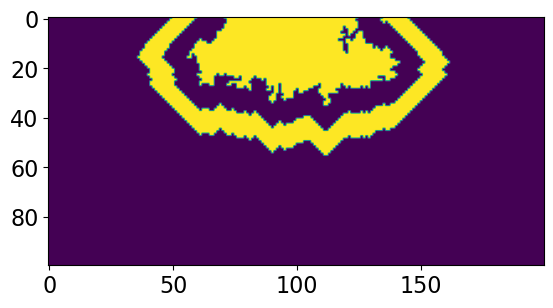

In [32]:
buffer = create_continuous_buffer(infilled_clusters , 10)
plt.imshow(create_continuous_buffer(infilled_clusters | buffer, 10) | (infilled_clusters))

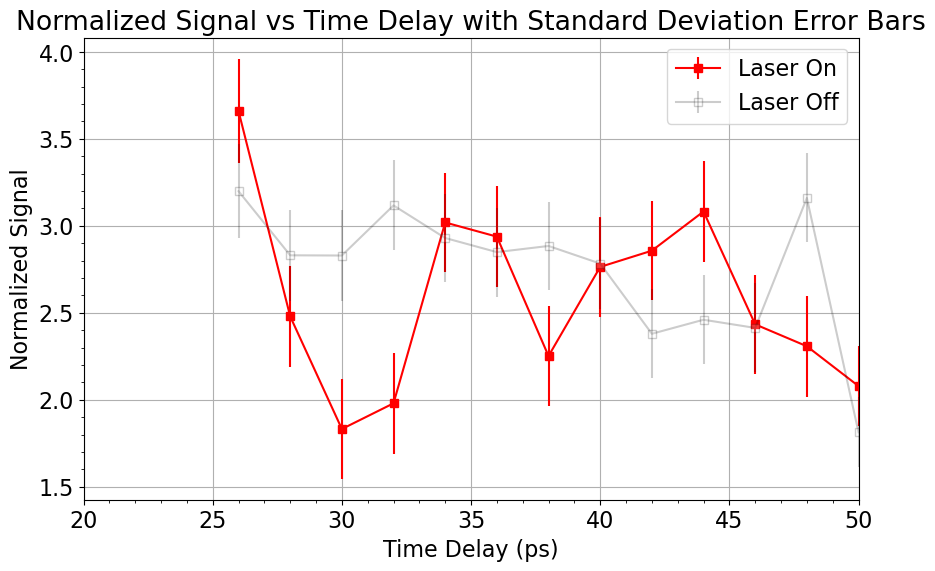

In [16]:
plot_normalized_signal_vs_time_delay(stacks_on, stacks_off, I0, arg_laser_on, arg_laser_off);

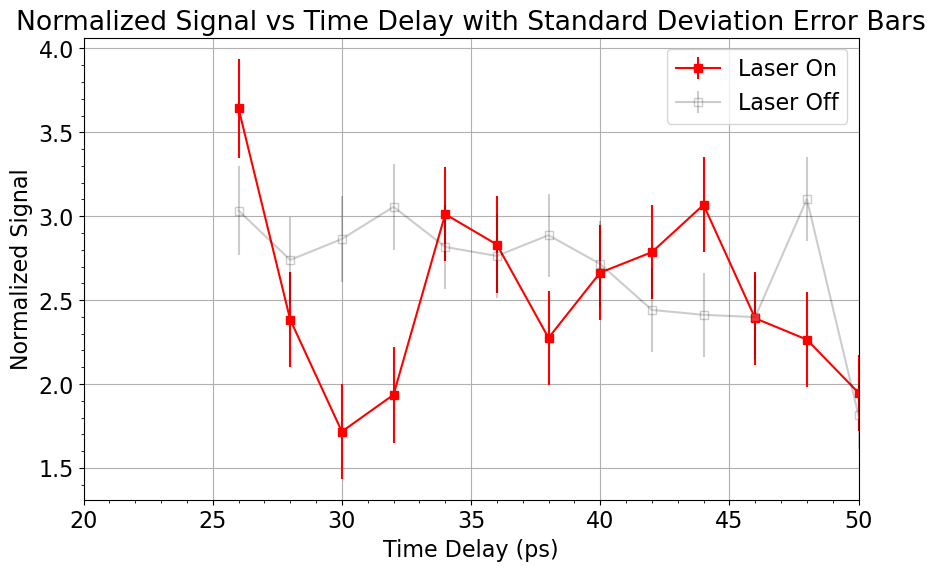

In [15]:
plot_normalized_signal_vs_time_delay(stacks_on, stacks_off, I0, arg_laser_on, arg_laser_off);

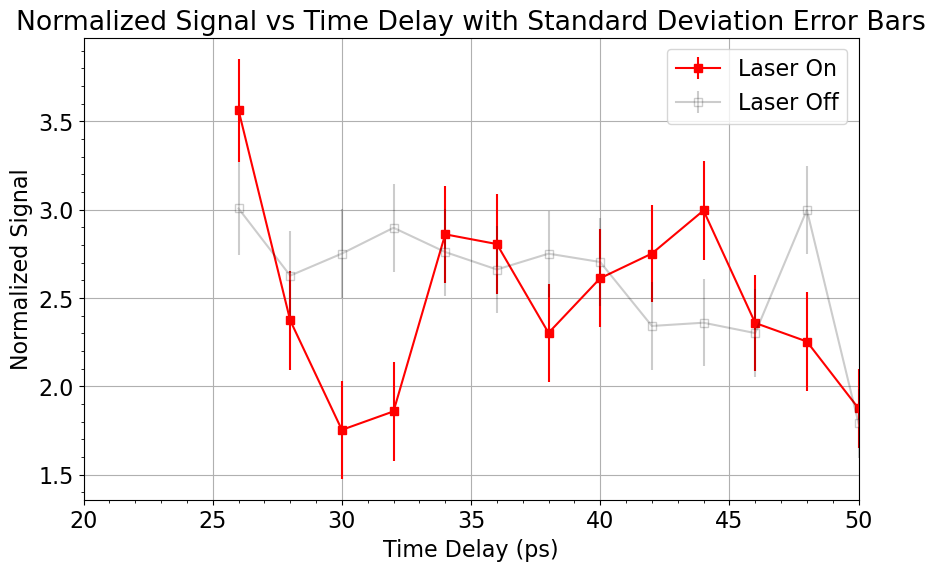

In [87]:
plot_normalized_signal_vs_time_delay(stacks_on, stacks_off, I0, arg_laser_on, arg_laser_off);

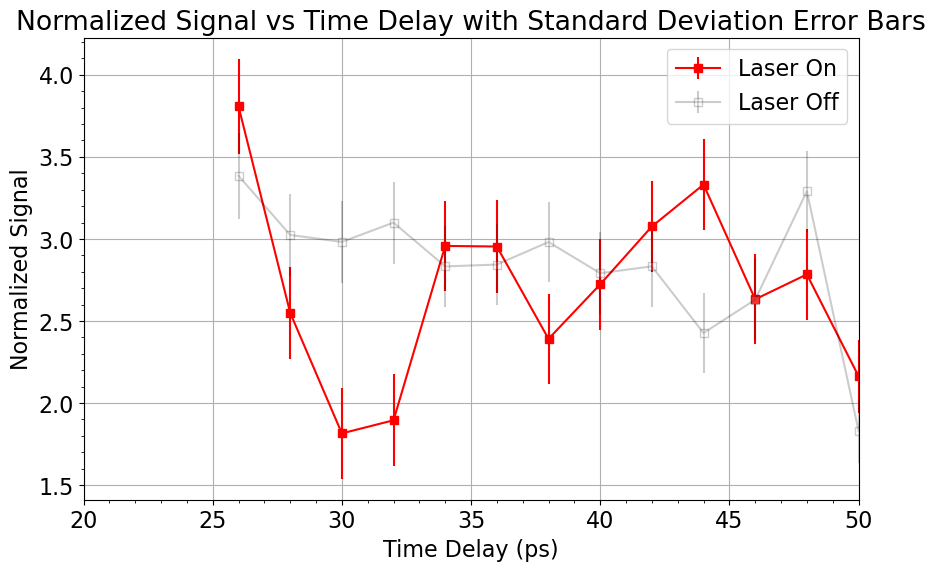

In [85]:
plot_normalized_signal_vs_time_delay(stacks_on, stacks_off, I0, arg_laser_on, arg_laser_off);

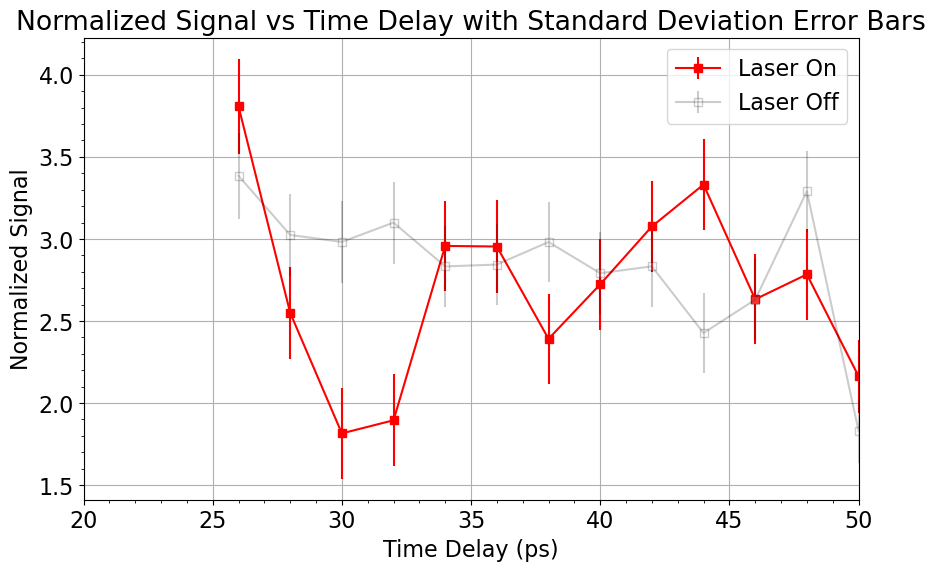

In [76]:
delays_on, norm_signal_on, norm_signal_off, std_dev_on, std_dev_off = plot_normalized_signal_vs_time_delay(stacks_on, stacks_off, I0, arg_laser_on, arg_laser_off)

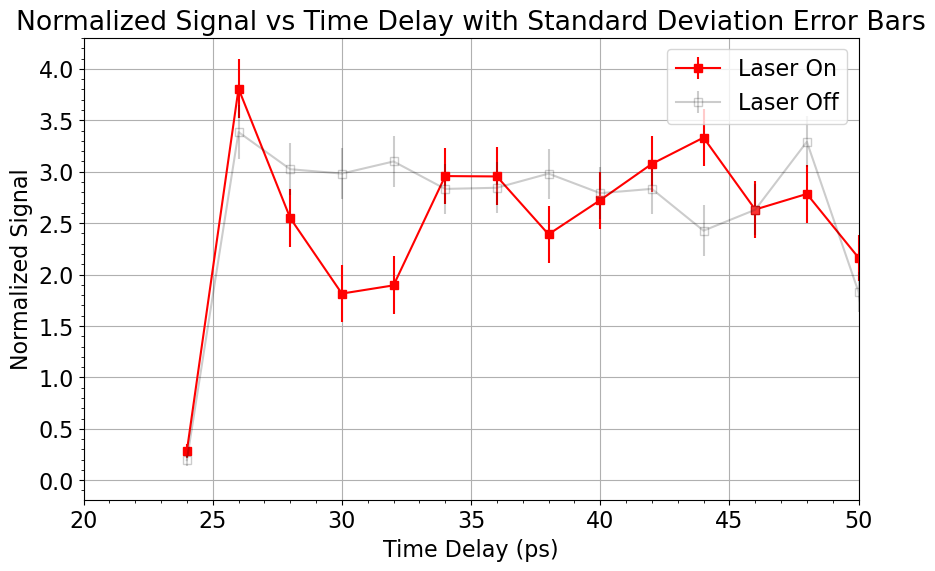

In [64]:
delays_on, norm_signal_on, norm_signal_off, std_dev_on, std_dev_off = plot_normalized_signal_vs_time_delay(stacks_on, stacks_off, I0, arg_laser_on, arg_laser_off)

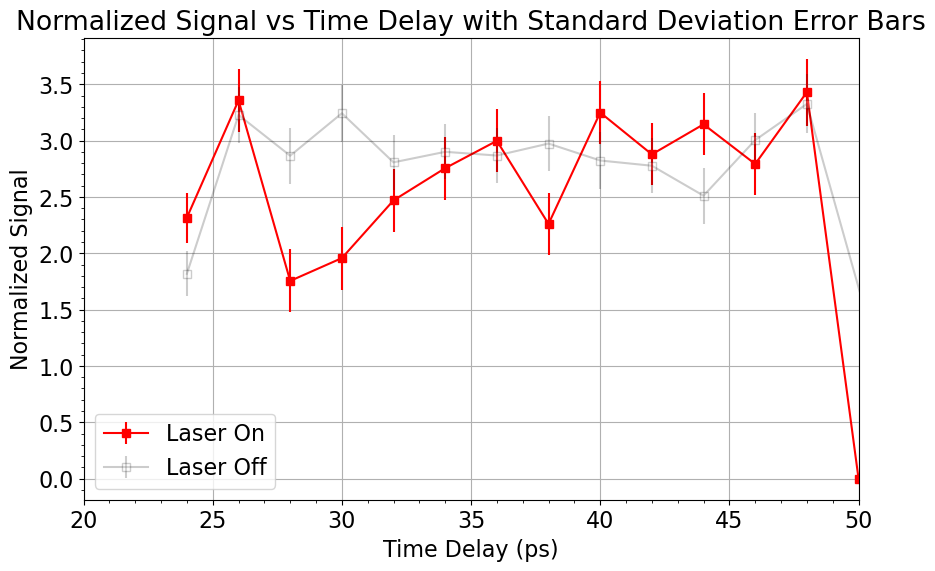

In [56]:
delays_on, norm_signal_on, norm_signal_off, std_dev_on, std_dev_off = plot_normalized_signal_vs_time_delay(stacks_on, stacks_off, I0, arg_laser_on, arg_laser_off)

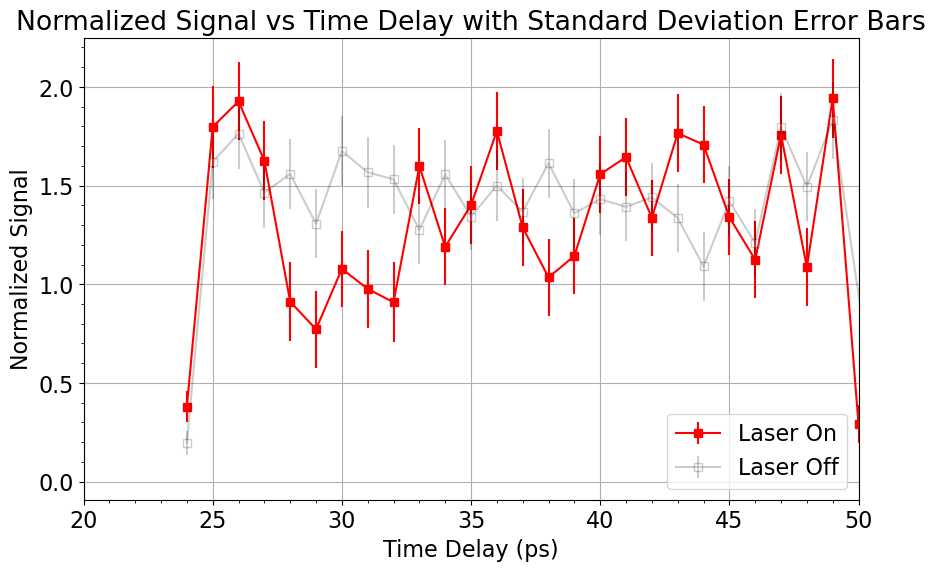

In [45]:
delays_on, norm_signal_on, norm_signal_off, std_dev_on, std_dev_off = plot_normalized_signal_vs_time_delay(stacks_on, stacks_off, I0, arg_laser_on, arg_laser_off)

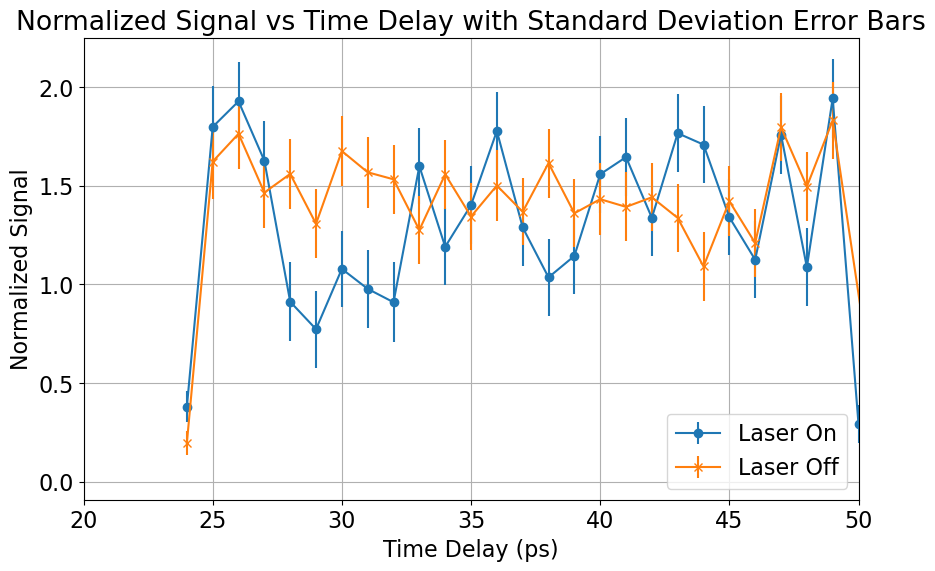

In [43]:
delays_on, norm_signal_on, norm_signal_off, std_dev_on, std_dev_off = plot_normalized_signal_vs_time_delay(stacks_on, stacks_off, I0, arg_laser_on, arg_laser_off)

In [33]:
lst = list(stacks_on.items())

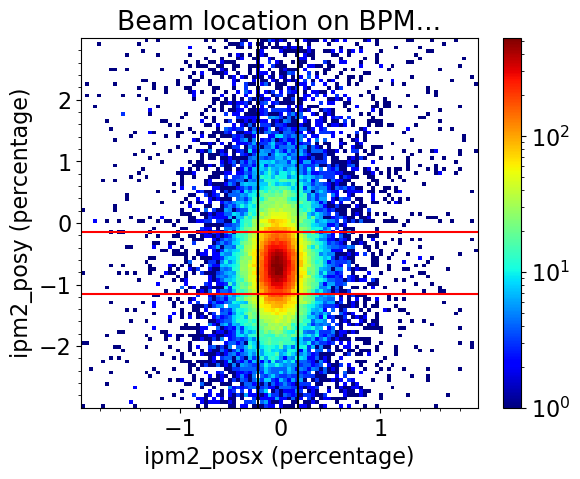

Number of laser delays is: 25, with an interval of 1.00 ps.


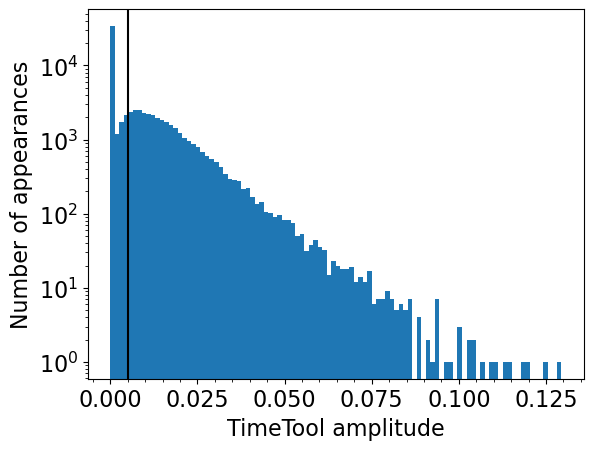

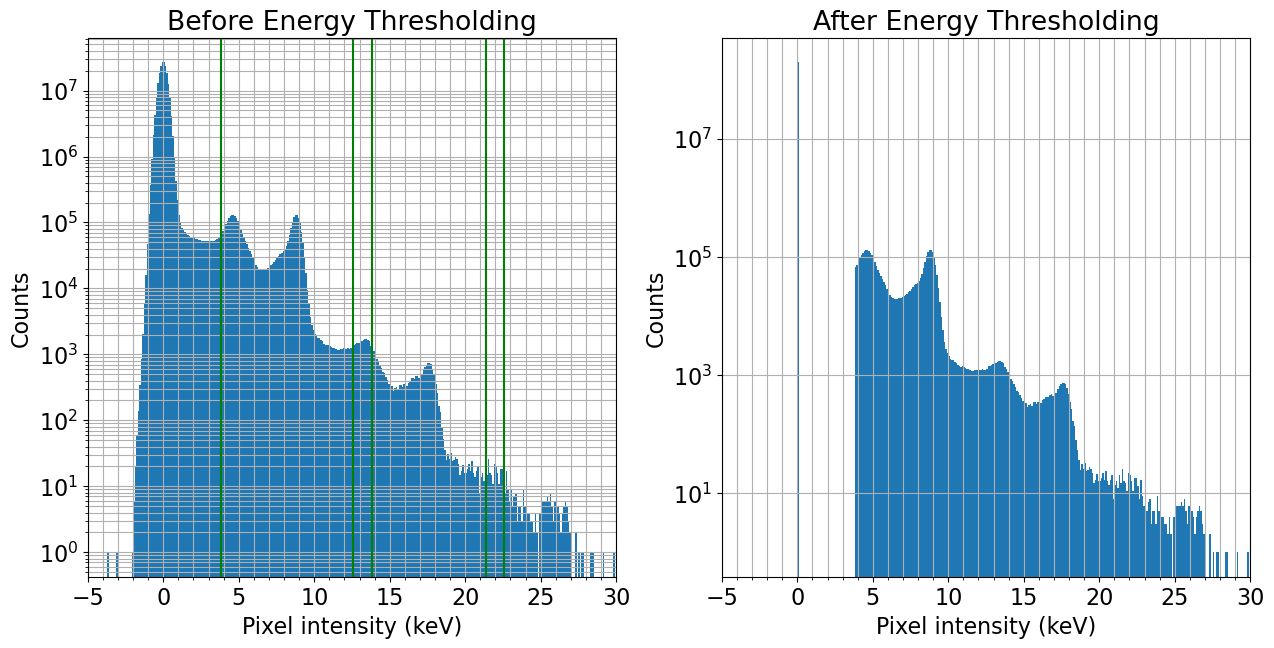

Working on the data of delay 25.43 ps...
Number of laser on and off events after filtering are 878/869.
Working on the data of delay 26.50 ps...
Number of laser on and off events after filtering are 762/650.
Working on the data of delay 27.49 ps...
Number of laser on and off events after filtering are 768/660.
Working on the data of delay 28.50 ps...
Number of laser on and off events after filtering are 783/674.
Working on the data of delay 29.50 ps...
Number of laser on and off events after filtering are 760/661.
Working on the data of delay 30.50 ps...
Number of laser on and off events after filtering are 726/648.
Working on the data of delay 31.50 ps...
Number of laser on and off events after filtering are 765/705.
Working on the data of delay 32.49 ps...
Number of laser on and off events after filtering are 795/652.
Working on the data of delay 33.50 ps...
Number of laser on and off events after filtering are 722/641.
Working on the data of delay 34.50 ps...
Number of laser on and 

In [187]:
delay,imgs_on,imgs_off, alldelay, allimgs, arg_laser_on, arg_laser_off, I0  = CDW_PP(Run_Number, ROI, Energy_Filter, I0_Threshold, IPM_pos_Filter, Time_bin,TimeTool)


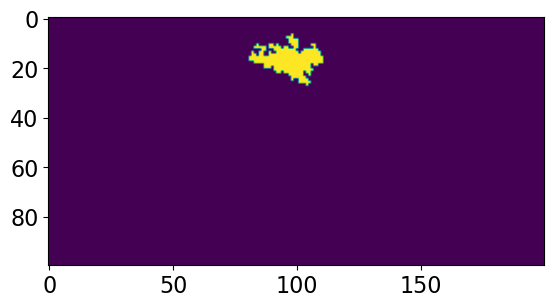

In [26]:
plt.imshow(infilled_clusters)

In [ ]:
def visualize_steps(integrated_counts: np.ndarray, infilled_clusters: np.ndarray, buffer: np.ndarray):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(integrated_counts, cmap='viridis')
    axes[0].set_title('Integrated Counts')
    axes[0].axis('off')
    axes[1].imshow(infilled_clusters, cmap='binary')
    axes[1].set_title('Infilled Clusters (Signal Region)')
    axes[1].axis('off')
    axes[2].imshow(buffer, cmap='Reds')
    axes[2].set_title('Buffer Region')
    axes[2].axis('off')
    plt.tight_layout()
    plt.show()

In [18]:
np.savez('histograms.npz', histograms)

In [8]:
import numpy as np
from lcls import pvalues as pv

# # Define parameters
# roi_x_start, roi_x_end = 30, 80
# roi_y_start, roi_y_end = 40, 90
# bin_boundaries = np.arange(5, 30, 0.2)
# hist_start_bin = 1
# energies = bin_boundaries[hist_start_bin + 1:]

# bin_boundaries = np.arange(5, 30, 0.2)
# hist_start_bin = 1
# # Define parameters
# roi_x_start, roi_x_end = 50, 100
# roi_y_start, roi_y_end = 0, 200
# energies = bin_boundaries[hist_start_bin + 1:]

# data = imgs_thresh#[:7000, ...]#load_data(filepath)
# histograms = calculate_histograms(data, bin_boundaries, hist_start_bin)

threshold_values = np.linspace(0.02, 1, 10)

roi_coordinates = (roi_x_start, roi_x_end, roi_y_start, roi_y_end)

threshold = .2
z_offset = 20


# # Run the analysis
# emd_values, p_values, _, roi_connected_cluster, _, infilled_clusters = run_histogram_analysis(
#     data, bin_boundaries, hist_start_bin, roi_x_start, roi_x_end, roi_y_start, roi_y_end,
#     threshold = threshold)

integrated_counts = filter_and_sum_histograms(histograms, energies, 8, 10)
signal = calculate_total_counts(integrated_counts, infilled_clusters)
std_signal = np.sqrt(signal)

# Rerun the analysis using different thresholds
p_values_fixed = []

for threshold in threshold_values:
    p_value = pv.compute_aggregate_pvals(
        bin_boundaries, hist_start_bin,
        roi_coordinates, threshold,
        100, z_offset, data = data,
        signal_mask = None, random_state=42
    )
    p_values_fixed.append(p_value)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, p_values_fixed, marker='o')
plt.xlabel('Threshold')
plt.ylabel('P-value')
plt.title('P-value as a Function of Threshold')
plt.grid(True)
plt.show()

NameError: name 'infilled_clusters' is not defined

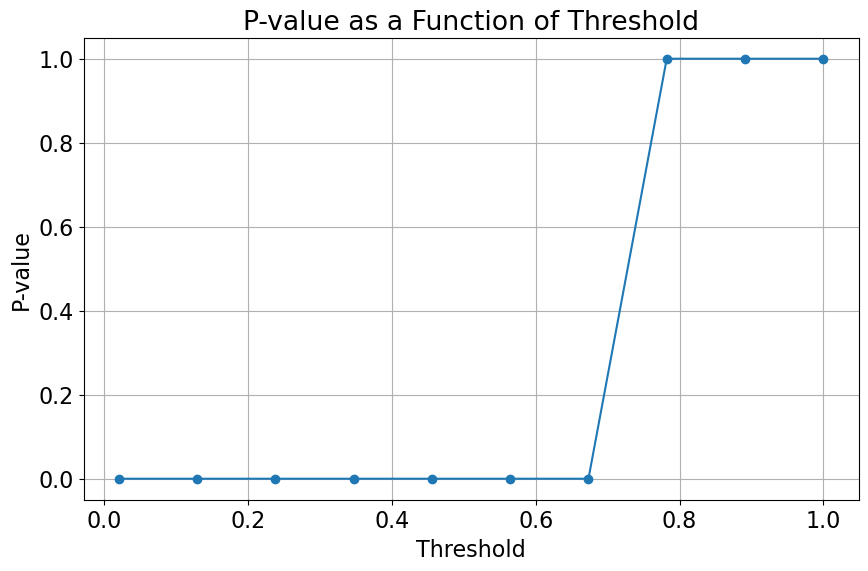

In [24]:
# threshold_values = np.linspace(0.02, 1, 10)
# # threshold_values = np.linspace(0.05, 1, 10)

# roi_coordinates = (roi_x_start, roi_x_end, roi_y_start, roi_y_end)

# def visualize_steps(integrated_counts: np.ndarray, infilled_clusters: np.ndarray, buffer: np.ndarray):
#     fig, axes = plt.subplots(1, 3, figsize=(15, 5))
#     axes[0].imshow(integrated_counts, cmap='viridis')
#     axes[0].set_title('Integrated Counts')
#     axes[0].axis('off')
#     axes[1].imshow(infilled_clusters, cmap='binary')
#     axes[1].set_title('Infilled Clusters (Signal Region)')
#     axes[1].axis('off')
#     axes[2].imshow(buffer, cmap='Reds')
#     axes[2].set_title('Buffer Region')
#     axes[2].axis('off')
#     plt.tight_layout()
#     plt.show()


# import numpy as np
# # from scipy.stats import wasserstein_distance
    
    
# # def perform_permutation_test(sample1, sample2, num_permutations, random_state=None):
# #     # Handle empty arrays or arrays with NaNs
# #     if len(sample1) == 0 or len(sample2) == 0 or np.isnan(sample1).any() or np.isnan(sample2).any():
# #         return np.nan
    
# #     np.random.seed(random_state)
    
# #     # Use absolute value for observed_diff
# #     observed_diff = np.abs(np.mean(sample1) - np.mean(sample2))
# #     all_samples = np.concatenate([sample1, sample2])
# #     count_extreme_values = 0
    
# #     for _ in range(num_permutations):
# #         np.random.shuffle(all_samples)
# #         new_diff = np.abs(np.mean(all_samples[:len(sample1)]) - np.mean(all_samples[len(sample1):]))
# #         if new_diff >= observed_diff:
# #             count_extreme_values += 1
            
# #     p_value = count_extreme_values / num_permutations
# #     return p_value

# # # Wrapper function to calculate EMD values with a specified ROI
# # def calculate_emd_values_with_roi(data, bin_boundaries, hist_start_bin, roi_coordinates):
# #     histograms = calculate_histograms(data, bin_boundaries, hist_start_bin)
# #     roi_x_start, roi_x_end, roi_y_start, roi_y_end = roi_coordinates
# #     average_histogram = get_average_roi_histogram(histograms, roi_x_start, roi_x_end, roi_y_start, roi_y_end)
# #     emd_values = calculate_emd_values(histograms, average_histogram)
# #     return emd_values, average_histogram

# # # Helper function to get background EMD values based on signal mask
# # def get_background_emd_values(infilled_clusters, z_offset):
# #     # Shift the mask up by 'z_offset' indices in the 0th mask dimension
# #     shifted_mask = np.roll(infilled_clusters, -z_offset, axis=0)
# #     return shifted_mask

# # # Top-level function to execute a permutation test to compare EMD values between a signal ROI and background
# # def compute_aggregate_pvals(bin_boundaries, hist_start_bin, roi_coordinates, threshold,
# #                                             num_permutations, z_offset, background_mask = None,
# #                                             infilled_clusters= None, random_state=None):
# #     if random_state is not None:
# #         np.random.seed(random_state)
# #     if infilled_clusters is None:
# #         _, _, _, _, _, infilled_clusters = run_histogram_analysis(
# #             data, bin_boundaries, hist_start_bin, roi_coordinates[0], roi_coordinates[1], 
# #             roi_coordinates[2], roi_coordinates[3], num_permutations=num_permutations, threshold=threshold)
    
# #     emd_values, average_histogram = calculate_emd_values_with_roi(data, bin_boundaries, hist_start_bin, roi_coordinates)
# #     signal_emd_values = emd_values[infilled_clusters].flatten()
    
# #     roi_x_start, roi_x_end, roi_y_start, roi_y_end = roi_coordinates
# #     if background_mask is None:
# #         background_mask = get_background_emd_values(infilled_clusters, z_offset)

# #     background_emd_values = emd_values[background_mask].flatten()
    
# # #     p_value = perform_permutation_test(signal_emd_values, background_emd_values, num_permutations, average_histogram,
# # #                                        random_state)
# #     p_value = perform_permutation_test(signal_emd_values, background_emd_values,
# #                                        num_permutations, random_state)
# #     return p_value


# threshold = .2
# z_offset = 20

# # Run the analysis
# emd_values, p_values, _, roi_connected_cluster, _, infilled_clusters = run_histogram_analysis(
#     data, bin_boundaries, hist_start_bin, roi_x_start, roi_x_end, roi_y_start, roi_y_end,
#     threshold = threshold)


# integrated_counts = filter_and_sum_histograms(histograms, energies, 8, 10)
# signal = calculate_total_counts(integrated_counts, infilled_clusters)
# std_signal = np.sqrt(signal)

# # Rerun the analysis using different thresholds
# p_values_fixed = []

# for threshold in threshold_values:
#     p_value = compute_aggregate_pvals(
#         bin_boundaries, hist_start_bin,
#         roi_coordinates, threshold,
#         100, z_offset,
#         infilled_clusters = None, random_state=42
#     )
#     p_values_fixed.append(p_value)

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(threshold_values, p_values_fixed, marker='o')
# plt.xlabel('Threshold')
# plt.ylabel('P-value')
# plt.title('P-value as a Function of Threshold')
# plt.grid(True)
# plt.show()

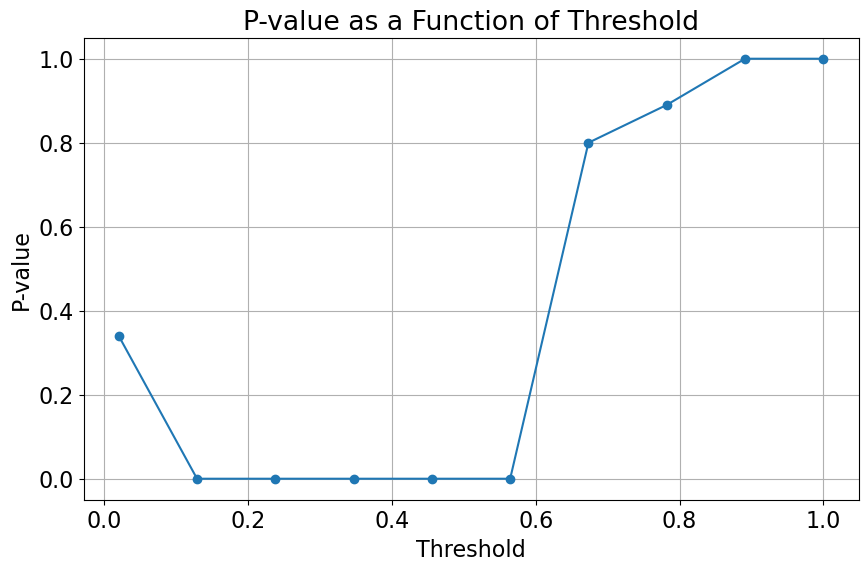

'Analysis and plotting complete.'

In [46]:
def compute_signal(infilled_clusters):
    integrated_counts = filter_and_sum_histograms(histograms, energies, 8, 10)
    signal, std_signal = calculate_total_counts(integrated_counts, infilled_clusters)
    p_value = compute_aggregate_pvals(
            bin_boundaries, hist_start_bin, roi_coordinates, threshold,
            100, z_offset, data = data,
        infilled_clusters = None, random_state=42
        )
    return signal, std_signal, p_value

/sdf/home/o/ohoidn/pumpml/histogram_analysis.py:230: RuntimeWarning: Mean of empty slice.
  mean_0 = imgs_sum[~mask].mean()
/sdf/group/lcls/ds/ana/sw/conda1/inst/envs/ana-4.0.54-py3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


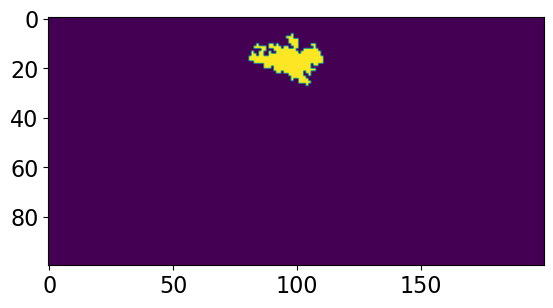

In [48]:
compute_signal(infilled_clusters)
plt.imshow(infilled_clusters)

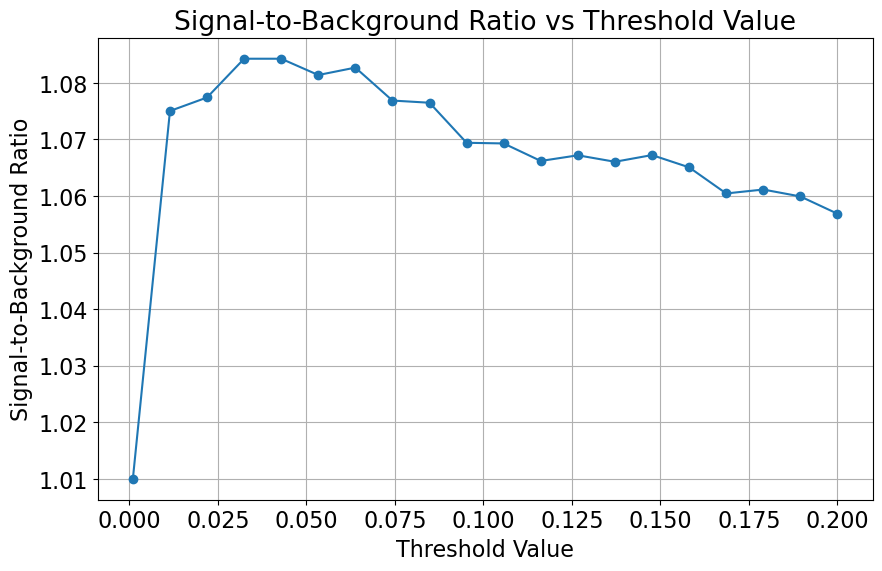

In [294]:
import matplotlib.pyplot as plt
import numpy as np

def plot_signal_to_bg_ratio(data, bin_boundaries, hist_start_bin, roi_x_start, roi_x_end, roi_y_start, roi_y_end):
    threshold_values = np.linspace(0.001, 0.2, 20)  # Replace with the range and granularity you're interested in
    ratio_list = []
    
    for threshold in threshold_values:
        # Run the analysis for each threshold value
        emd_values, p_values, _, roi_connected_cluster, _, infilled_clusters = run_histogram_analysis(
            data, bin_boundaries, hist_start_bin, roi_x_start, roi_x_end, roi_y_start, roi_y_end,
            threshold=threshold)
        
        signal, bg, _ = calculate_signal_background_noI0(data, infilled_clusters, bin_boundaries,
                                                   hist_start_bin)
        
        # Avoid division by zero
        if bg != 0:
            ratio = signal / bg
        else:
            ratio = np.nan  # or some other indicator value
        
        ratio_list.append(ratio)
    
    plt.figure(figsize=(10, 6))
    plt.plot(threshold_values, ratio_list, marker='o', linestyle='-')
    plt.xlabel('Threshold Value')
    plt.ylabel('Signal-to-Background Ratio')
    plt.title('Signal-to-Background Ratio vs Threshold Value')
    plt.grid(True)
    plt.show()

# Call the function
plot_signal_to_bg_ratio(data, bin_boundaries, hist_start_bin, roi_x_start, roi_x_end, roi_y_start, roi_y_end)


/tmp/ipykernel_2128988/757469771.py:36: RuntimeWarning: invalid value encountered in double_scalars
  return S, M * N / np.sum(buffer)


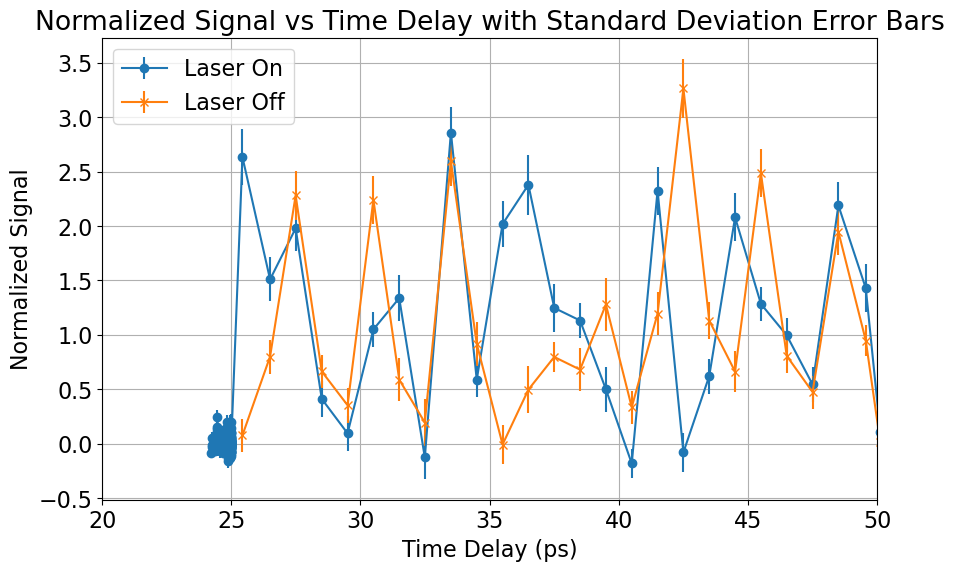

(25.0, 50.0)

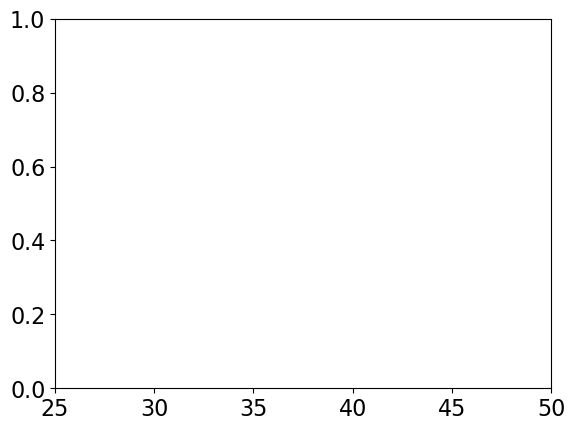

In [266]:
# import matplotlib.pyplot as plt
# import numpy as np


# def plot_normalized_signal_vs_time_delay(stacks_on, stacks_off, I0, arg_laser_on, arg_laser_off,


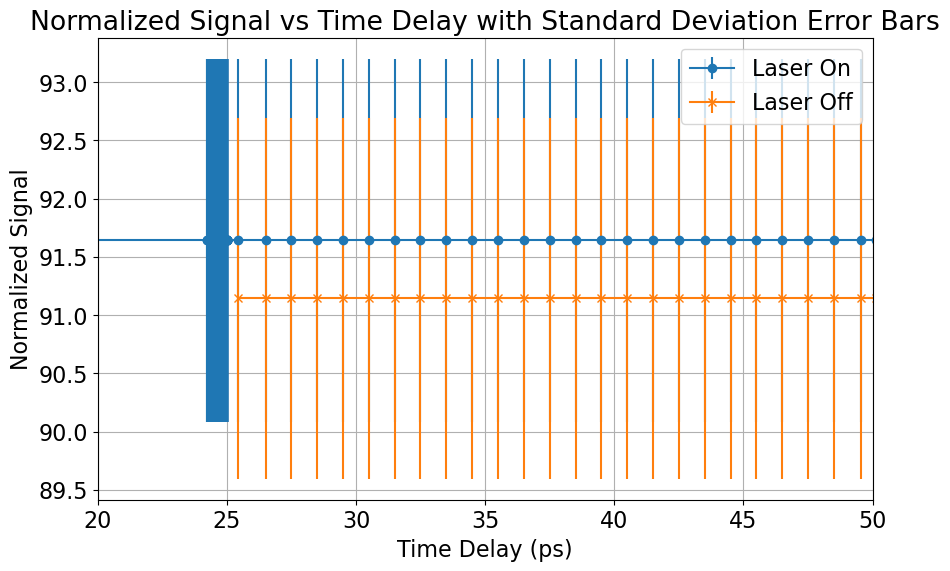

In [274]:
delays_on, norm_signal_on, norm_signal_off, std_dev_on, std_dev_off = plot_normalized_signal_vs_time_delay(
    stacks_on, stacks_off, I0, arg_laser_on, arg_laser_off, threshold = .2)

In [ ]:
plt.plot(norm_signal_on - norm_signal_off)

In [237]:
[v.shape for k, v in alldelay.items()]

AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [238]:
delay

array([25.43, 26.5 , 27.49, 28.5 , 29.5 , 30.5 , 31.5 , 32.49, 33.5 ,
       34.5 , 35.5 , 36.5 , 37.5 , 38.5 , 39.5 , 40.5 , 41.5 , 42.5 ,
       43.5 , 44.5 , 45.5 , 46.5 , 47.5 , 48.5 , 49.56])

In [81]:
allimgs.shape

(72719, 100, 200)

In [78]:
delay

array([25.43, 26.5 , 27.49, 28.5 , 29.5 , 30.5 , 31.5 , 32.49, 33.5 ,
       34.5 , 35.5 , 36.5 , 37.5 , 38.5 , 39.5 , 40.5 , 41.5 , 42.5 ,
       43.5 , 44.5 , 45.5 , 46.5 , 47.5 , 48.5 , 49.56])

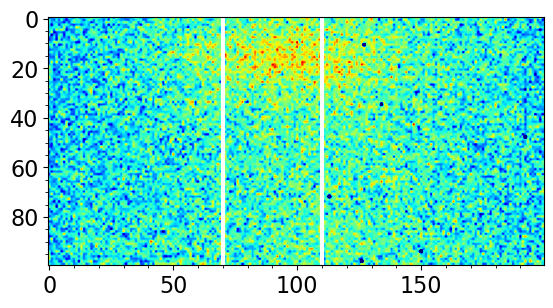

In [25]:
direction,boundary = 1,[70,110]
Intensity_on,Intensity_off = projection(imgs_on,imgs_off,direction,boundary)

In [26]:
data = {}
data['delay stage'] = delay
data['laser on images'] = imgs_on
data['laser off images'] = imgs_off
data['laser on traces'] = Intensity_on
data['laser off traces'] = Intensity_off

In [27]:
savemat("xppx1003221_processed_data_run.mat".format(Run_Number), data)

In [28]:
imgs_off.shape

(25, 100, 200)

Delay is 25.43 ps.


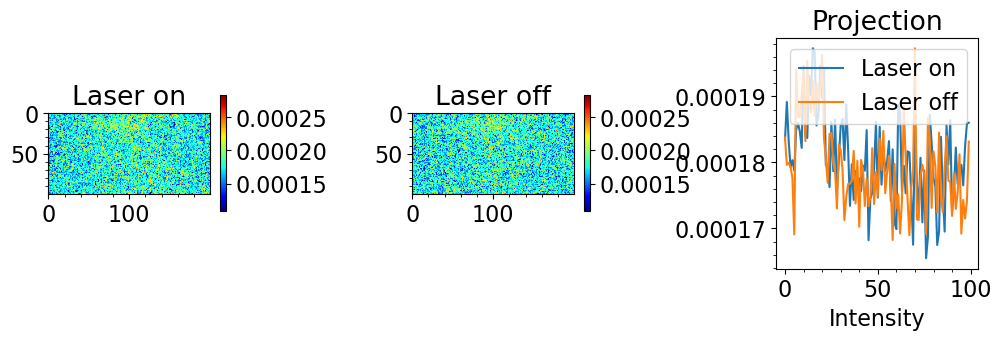

Delay is 26.5 ps.


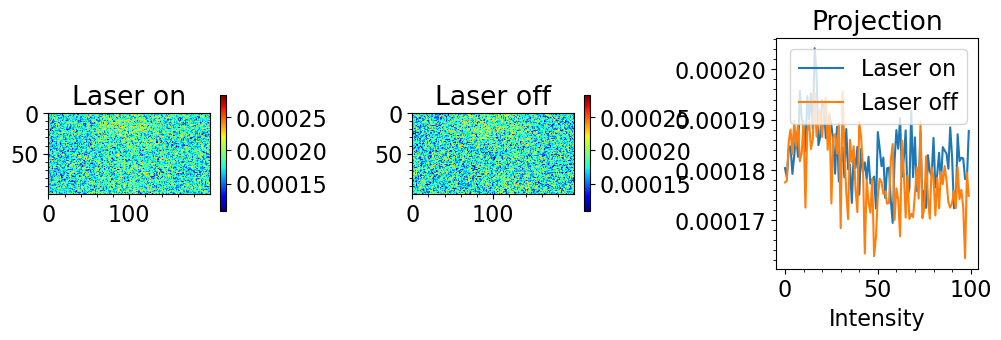

Delay is 27.49 ps.


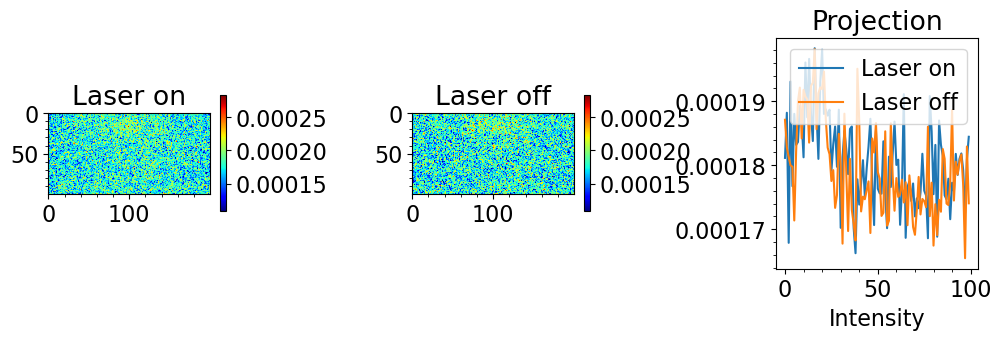

Delay is 28.5 ps.


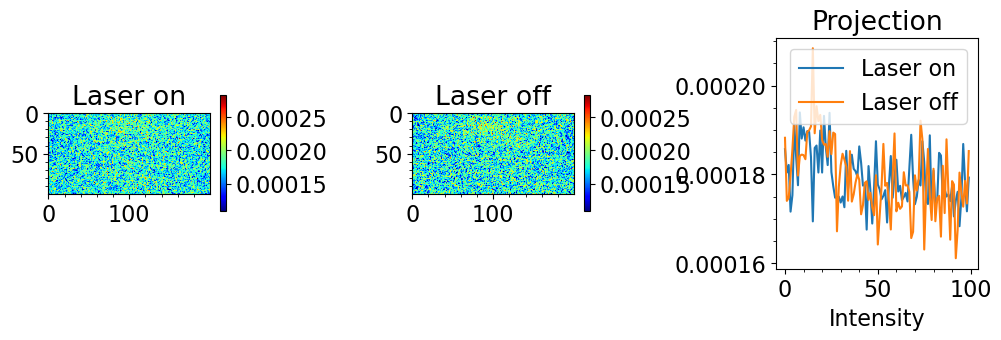

Delay is 29.5 ps.


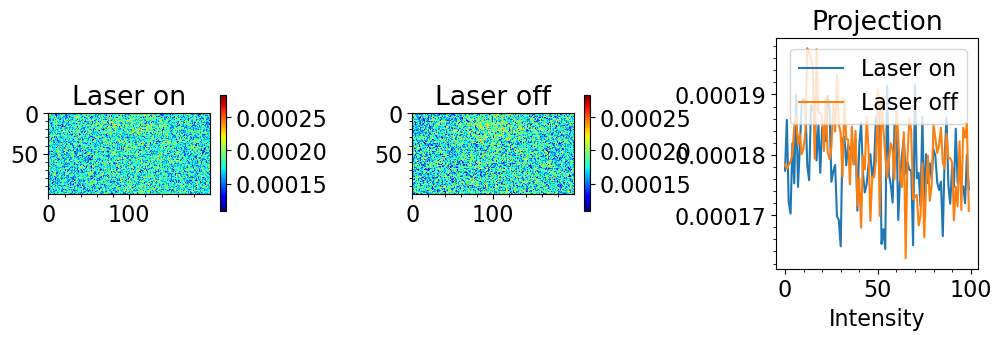

Delay is 30.5 ps.


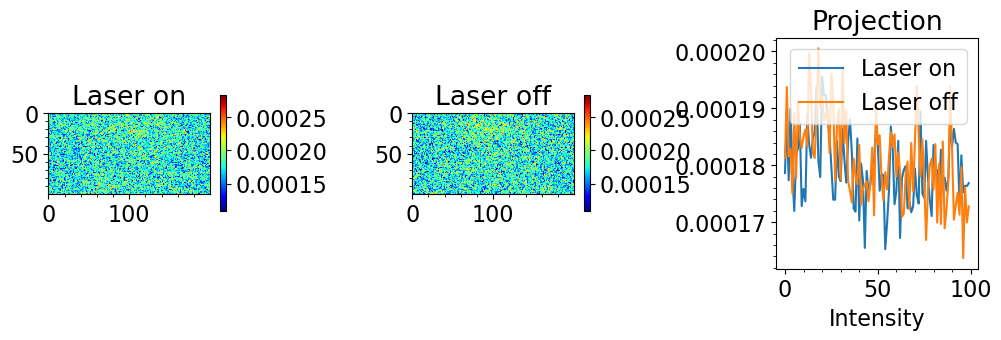

Delay is 31.5 ps.


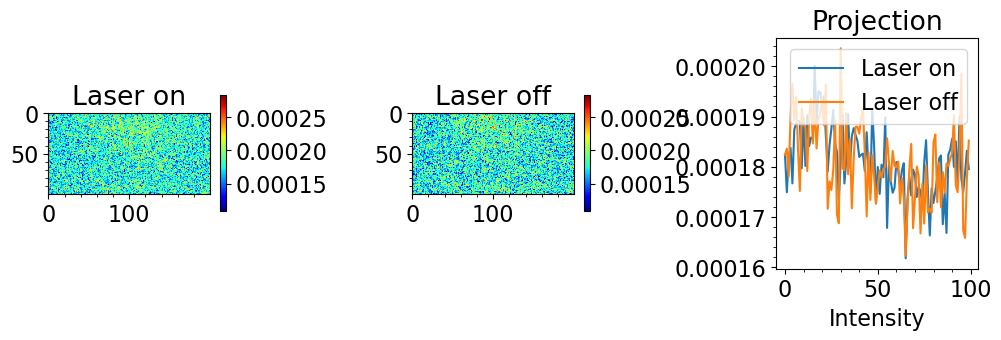

Delay is 32.49 ps.


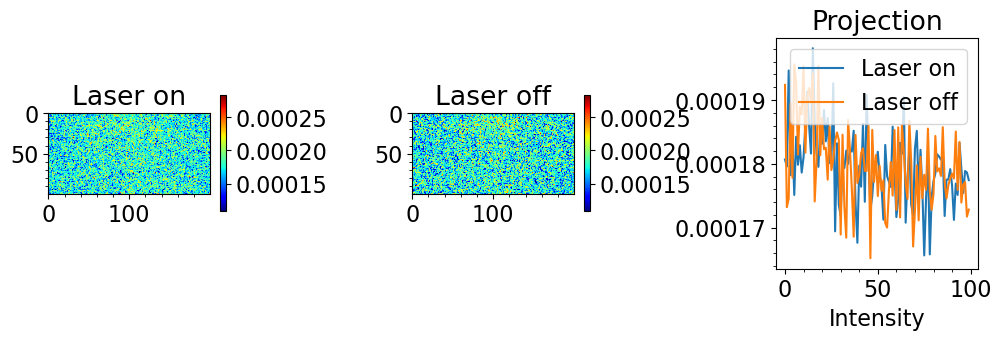

Delay is 33.5 ps.


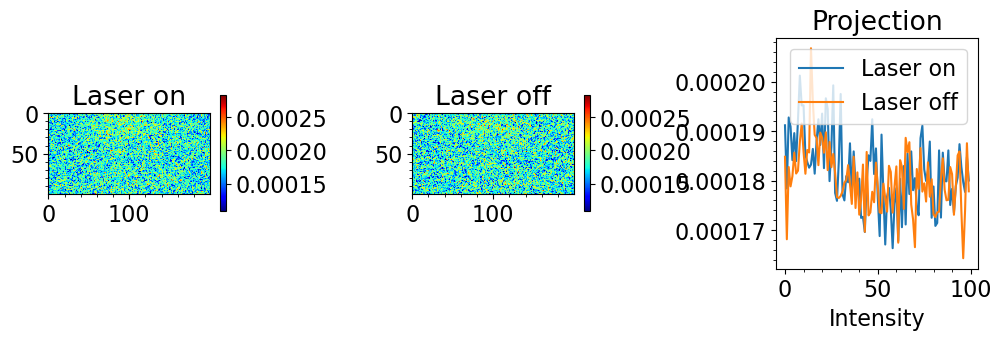

Delay is 34.5 ps.


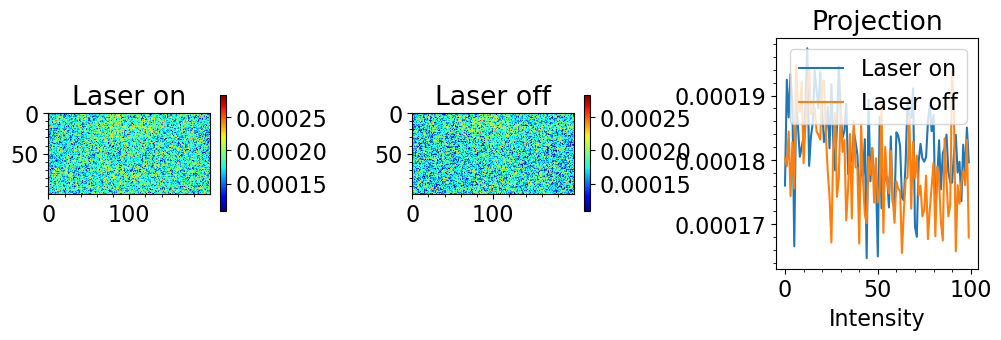

Delay is 35.5 ps.


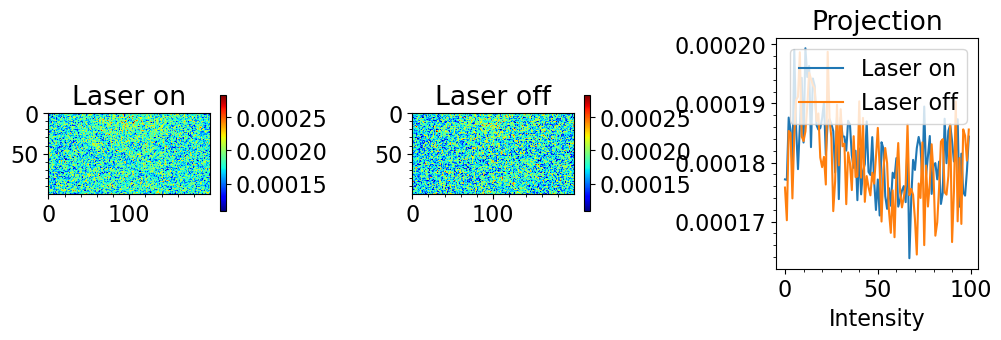

Delay is 36.5 ps.


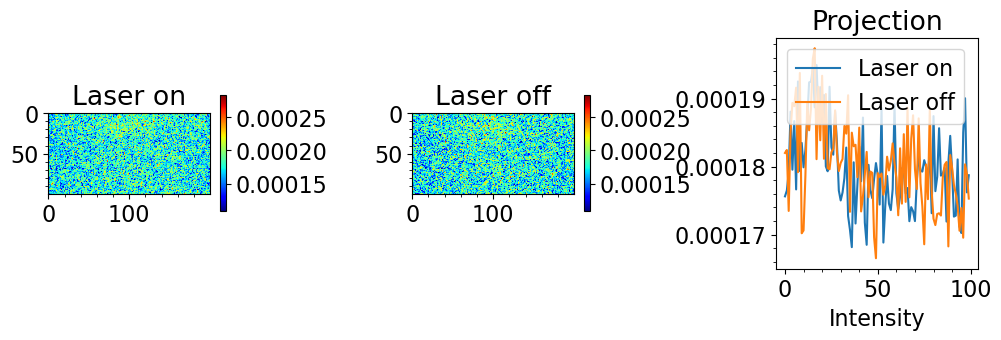

Delay is 37.5 ps.


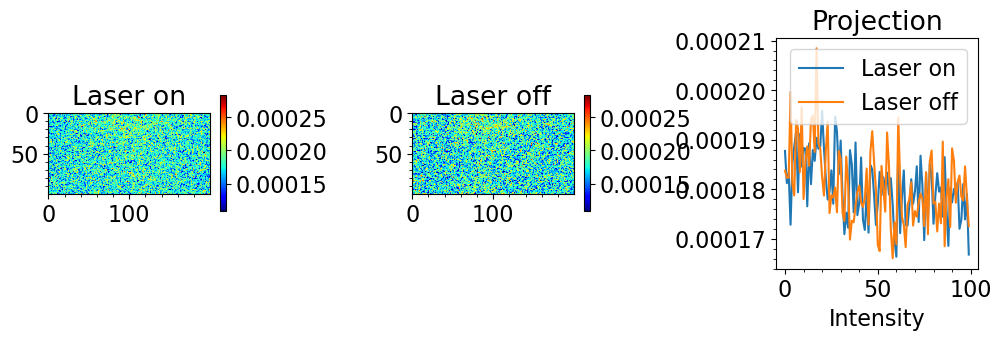

Delay is 38.5 ps.


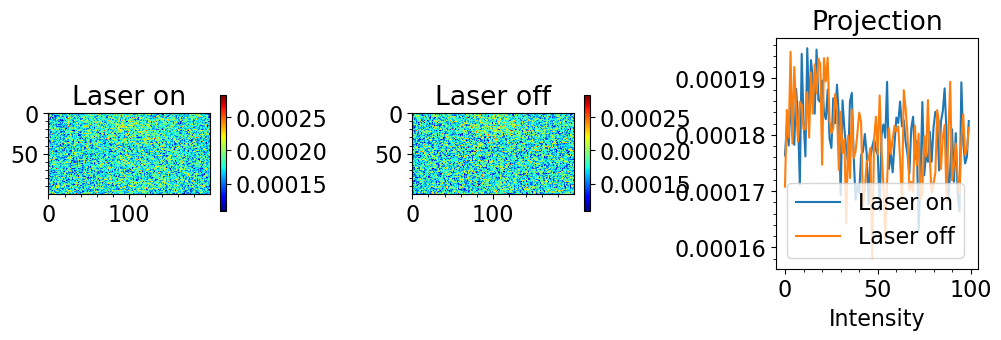

Delay is 39.5 ps.


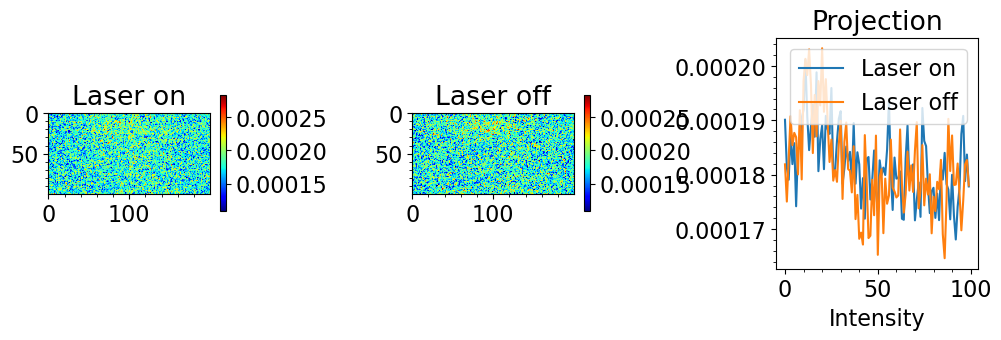

Delay is 40.5 ps.


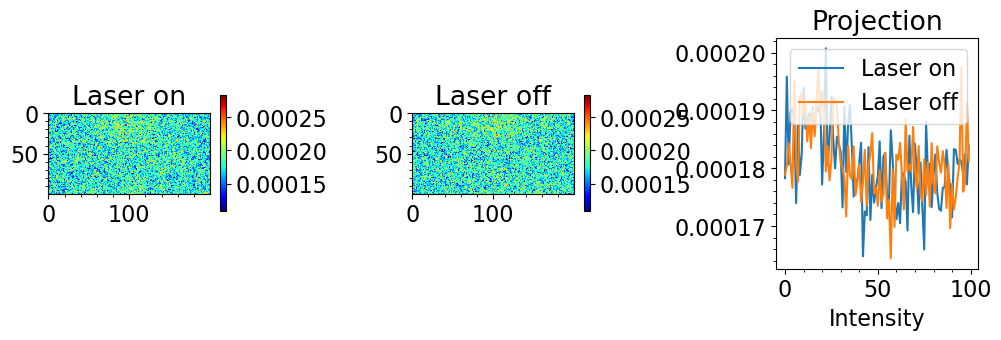

Delay is 41.5 ps.


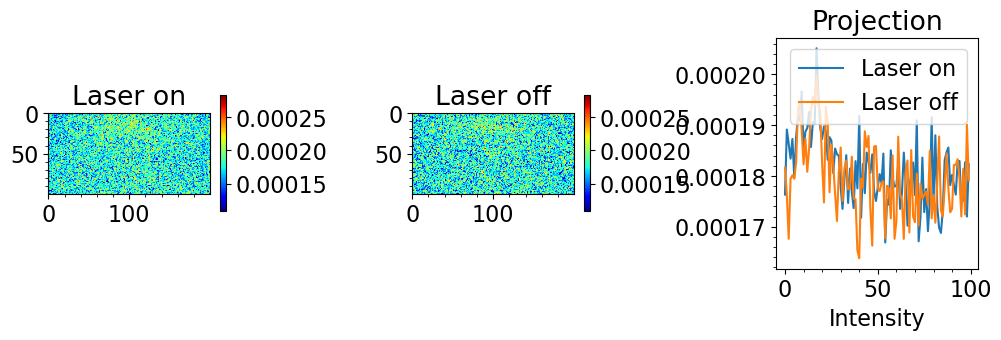

Delay is 42.5 ps.


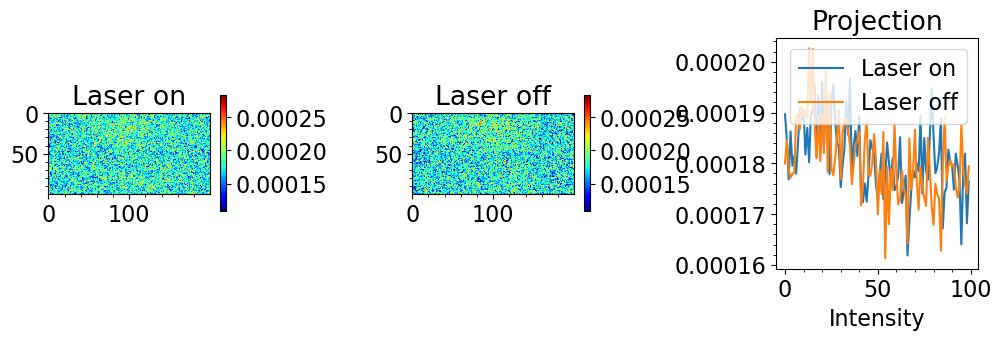

Delay is 43.5 ps.


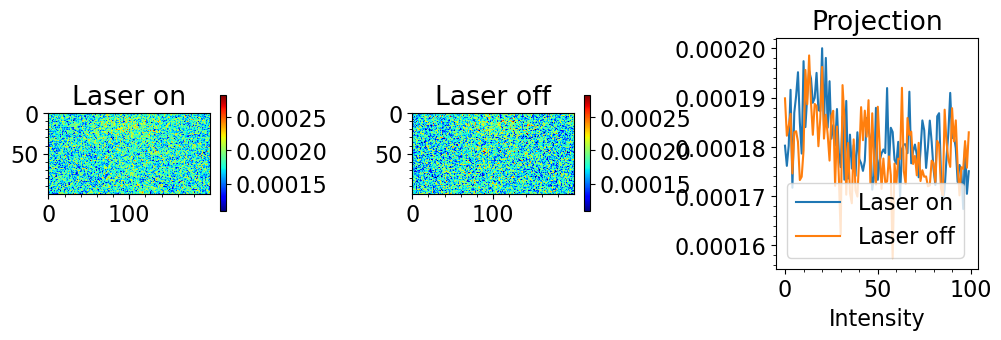

Delay is 44.5 ps.


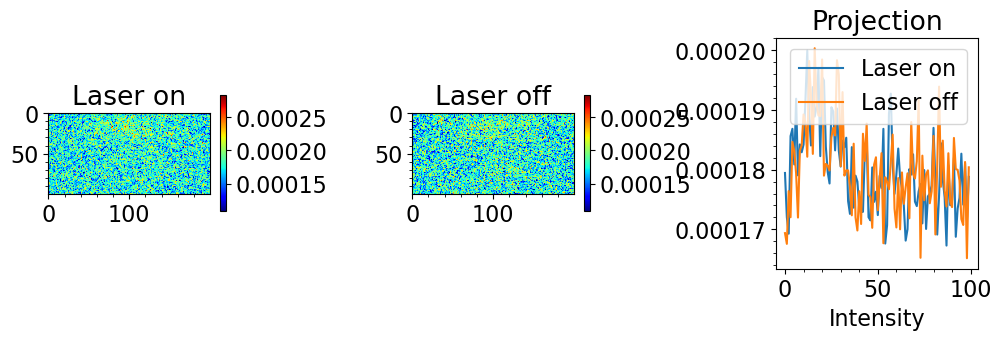

Delay is 45.5 ps.


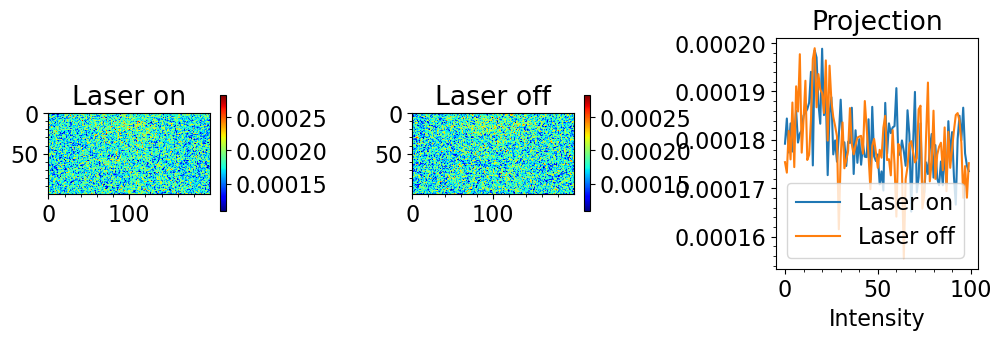

Delay is 46.5 ps.


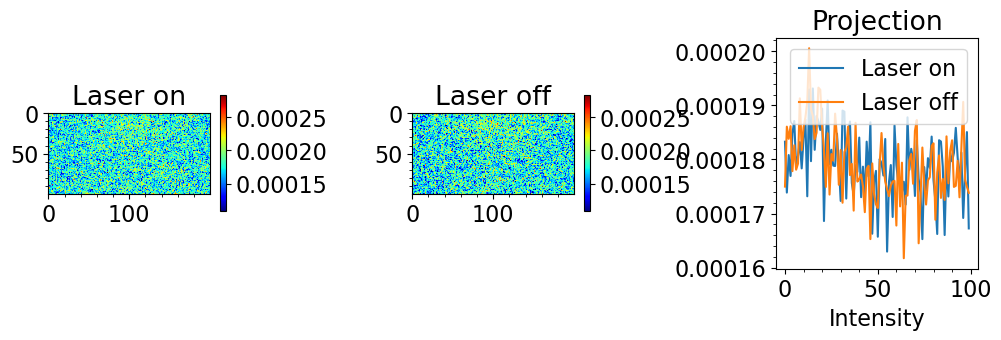

Delay is 47.5 ps.


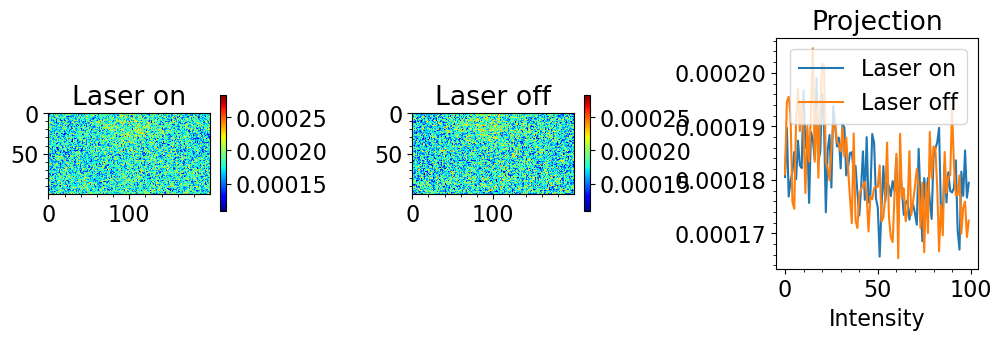

Delay is 48.5 ps.


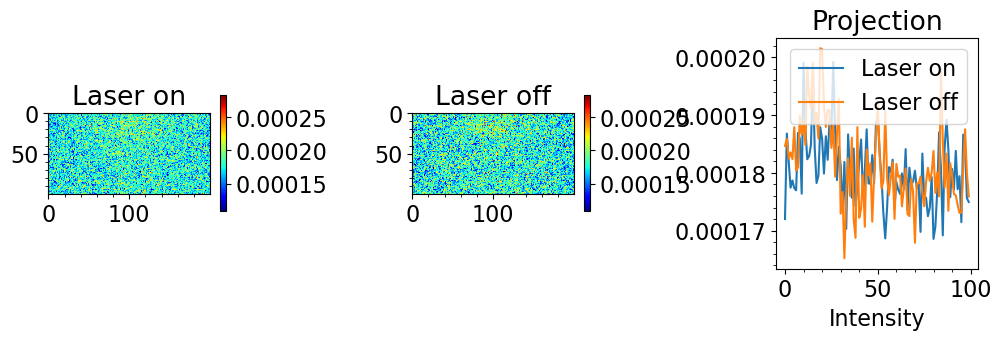

Delay is 49.56 ps.


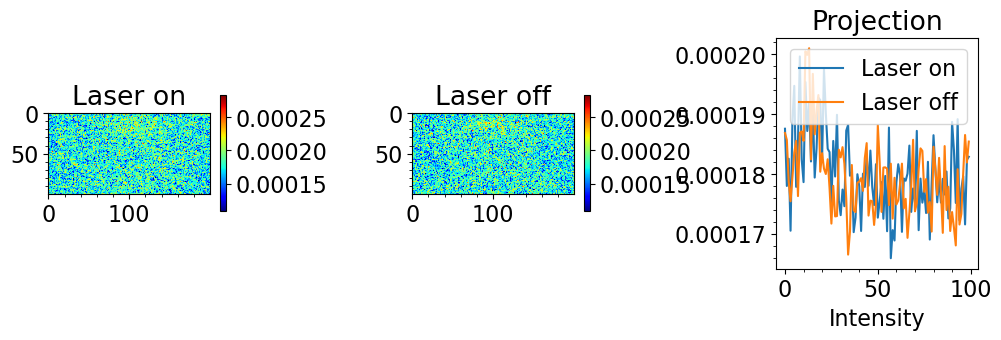

In [29]:
for i in range(len(delay)):
    print('Delay is {:} ps.'.format(delay[i]))
    fig,axs = plt.subplots(1,3,figsize=[12,3])
    clim1 = imgs_on[5:55,5:55].mean()-2*imgs_on[5:55,5:55].std()
    clim2 = imgs_on[5:55,5:55].mean()+3*imgs_on[5:55,5:55].std()
    axs[0].set_title('Laser on')
    im_on = cmap = axs[0].imshow(imgs_on[i],clim=[clim1,clim2],cmap='jet')
    axs[0].minorticks_on()
    cbar = plt.colorbar(im_on, ax=axs[0],shrink=0.5)
    
    axs[1].set_title('Laser off')
    im_off = cmap = axs[1].imshow(imgs_off[i],clim=[clim1,clim2],cmap='jet')
    axs[1].minorticks_on()
    cbar = plt.colorbar(im_off, ax=axs[1],shrink=0.5)
    
    axs[2].set_title('Projection')
    axs[2].plot(Intensity_on[i],label='Laser on')
    axs[2].plot(Intensity_off[i],label='Laser off')
    axs[2].minorticks_on()
    axs[2].set_xlabel('Pixel')
    axs[2].set_xlabel('Intensity')
    axs[2].legend()
    plt.subplots_adjust(wspace=0.8)
    plt.show()

In [35]:
infilled_clusters

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [70]:
# def extract_time_delay_stacks(delay, imgs):
#     time_bin_width = 1  # in ps
#     image_stacks = {}
#     unique_delays = np.unique(delay)
    
#     for d in unique_delays:
#         min_delay = d - 0.5
#         max_delay = d + 0.5
#         idx = np.where((delay >= min_delay) & (delay <= max_delay))[0]
#         image_stacks[d] = imgs[idx]
        
#     return image_stacks
def extract_time_delay_stacks(delay, imgs, min_images=500):
    image_stacks = {}
    unique_delays = np.unique(delay)
    
    for d in unique_delays:
        min_delay = d - Time_bin / 2
        max_delay = d + Time_bin / 2
        idx = np.where((delay >= min_delay) & (delay <= max_delay))[0]
        if len(idx) >= min_images:
            image_stacks[d] = imgs[idx]
            
    return image_stacks



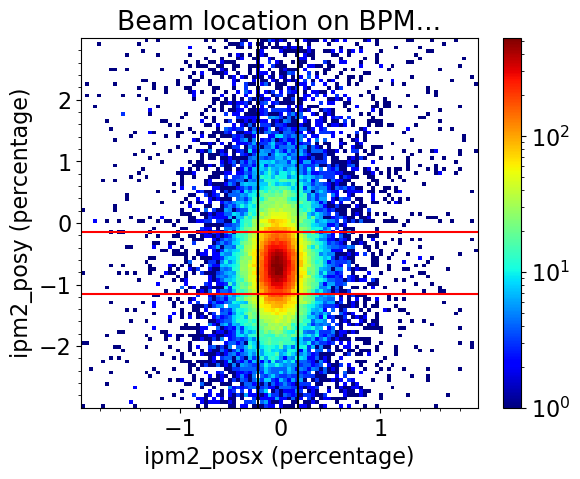

Number of laser delays is: 25, with an interval of 1.00 ps.


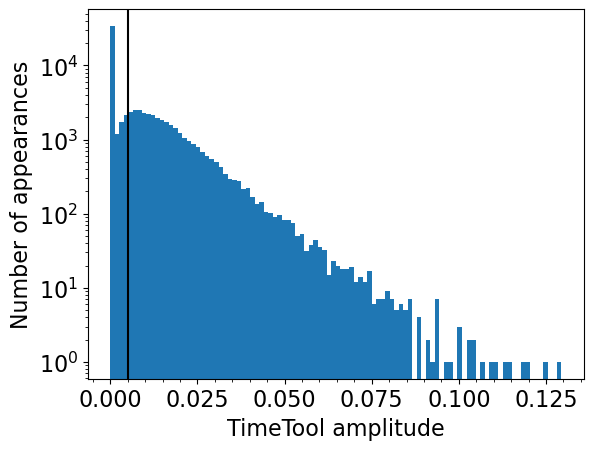

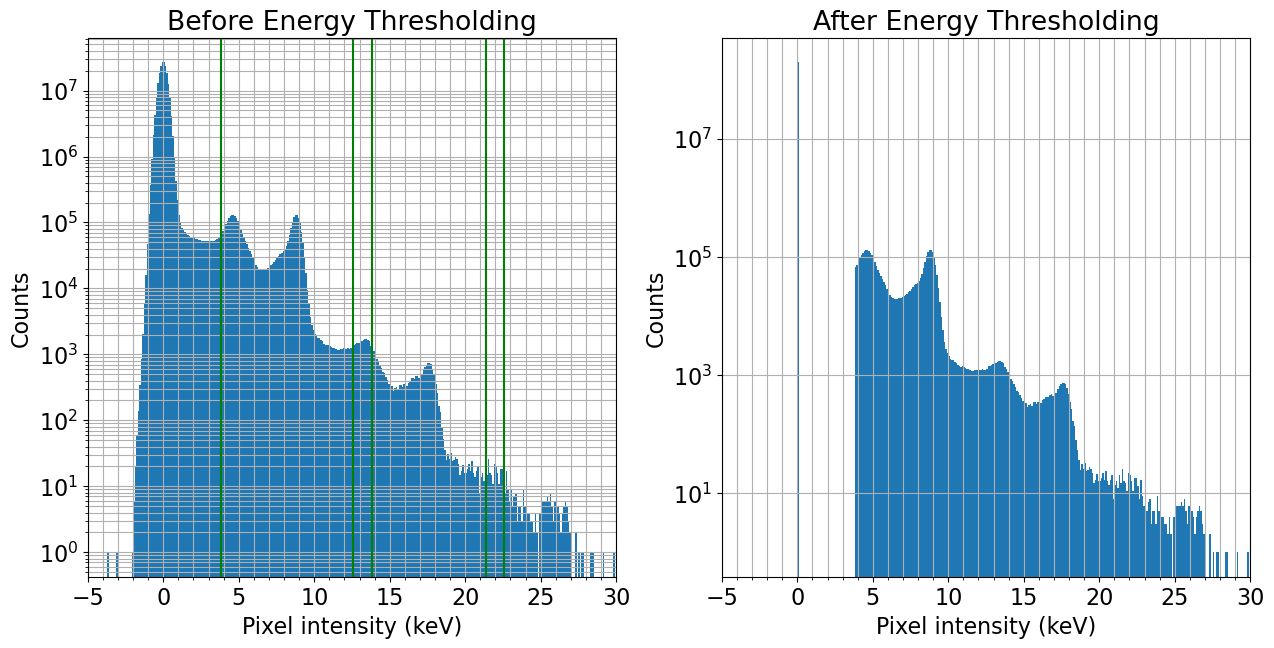

Working on the data of delay 25.43 ps...
Number of laser on and off events after filtering are 878/869.
Working on the data of delay 26.50 ps...
Number of laser on and off events after filtering are 762/650.
Working on the data of delay 27.49 ps...
Number of laser on and off events after filtering are 768/660.
Working on the data of delay 28.50 ps...
Number of laser on and off events after filtering are 783/674.
Working on the data of delay 29.50 ps...
Number of laser on and off events after filtering are 760/661.
Working on the data of delay 30.50 ps...
Number of laser on and off events after filtering are 726/648.
Working on the data of delay 31.50 ps...
Number of laser on and off events after filtering are 765/705.
Working on the data of delay 32.49 ps...
Number of laser on and off events after filtering are 795/652.
Working on the data of delay 33.50 ps...
Number of laser on and off events after filtering are 722/641.
Working on the data of delay 34.50 ps...
Number of laser on and 

In [31]:


# Call CDW_PP to get initial data
delay, imgs_on, imgs_off = CDW_PP(Run_Number, ROI, Energy_Filter, I0_Threshold, IPM_pos_Filter, Time_bin, TimeTool)

# Now you have 'delay', 'imgs_on', and 'imgs_off' variables populated.
# You can call extract_time_delay_stacks to get the stacks

image_stacks_on = extract_time_delay_stacks(delay, imgs_on)
image_stacks_off = extract_time_delay_stacks(delay, imgs_off)

# Now image_stacks_on and image_stacks_off contain your image stacks for "on" and "off" states, respectively, indexed by time delay.


In [32]:
root = SMD_Loader(Run_Number)

In [33]:
def h5_to_dict(node, d=None):
    if d is None:
        d = {}
    for child in node._f_list_nodes():
        if isinstance(child, tables.Group):
            d[child._v_name] = {}
            h5_to_dict(child, d[child._v_name])
        elif isinstance(child, tables.Leaf):
            d[child._v_name] = child.read()
    return d

In [34]:
d = h5_to_dict(root)

In [63]:
import pickle

In [66]:
with open('d.pkl', 'wb') as f:
    pickle.dump(d, f)

In [86]:
import numpy as np

def get_unique_delays(delay_array):
    """Get unique time delays from the array."""
    return np.unique(delay_array)

def filter_images_by_delay(delay_array, img_array, unique_delay, bin_width):
    """Filter images by time delay and return the stack."""
    indices = np.where((delay_array >= unique_delay - bin_width / 2) & 
                       (delay_array <= unique_delay + bin_width / 2))[0]
    return img_array[indices]

def quality_check(stack_dict, min_count):
    """Remove stacks that have fewer images than the minimum count."""
    return {k: v for k, v in stack_dict.items() if v.shape[0] >= min_count}


# Example usage:

# Assuming `delay` is your array containing time delay information for each image
# Assuming `imgs` is your array containing the images
# Setting bin_width to 0.5 ps as per your requirement
# Setting min_count to some minimum number of images that you want in each stack (e.g., 10)

# delay = np.array([0, 0.2, 0.5, 1, 1.2, 1.5])  # Replace with your actual delay array
# imgs = np.random.rand(6, 256, 256)  # Replace with your actual image array

bin_width = 0.5  # in picoseconds
min_count = 1  # Minimum number of images in each stack

stacks = extract_stacks_by_delay(alldelay, allimgs, bin_width, min_count)

# Now, `stacks` is a dictionary where the keys are unique time delays and the values are the stacks of images.


In [90]:
stacks[25.43].shape

(3396, 100, 200)